## IE7375: Data Mining in Engineering    Arasu Narayan
# <center> Modeling & Model Evaluation - Milestone 4&5
# <center> Yulin Hou
    
### <center> hou.yul@northeastern.edu
    
### Percentage of Effort Contributed by Student: 100%
### Signature of Student: Yulin Hou
### Submission Date: 04/18/2023

## · Introduction
### 1. The business problem I am going to work on in this course


The expansion of social media has had a significant impact on various industries, especially the news media industry, providing both opportunities and challenges for news organizations and individuals. Social media platforms such as Facebook, Twitter, and Instagram have become major sources of news and information for today’s people. This has led to a shift in the way that news is produced and consumed, with a person or organization who has expert product knowledge and influence in a respective field, known as influencer, could shape public opinion. Therefore, it has increased the competition for attention, making it more challenging for news organizations and individuals to stand out. Additionally, the rise of social media has also led to the spread of misinformation and fake news, which make people harder to discriminate.


To sum up, based on the dataset “Online News Popularity Data Set”, the first problem I am going to work on is to predict the online news popularity with a large list of characteristics known before publication that describe different aspects of the article. Secondly, I propose to explore the association between the news popularity and the characteristics of article, such as the data channel and weekday.



### 2. Explain a few sentences about the business problem

For the first business problem, predicting the online news popularity with characteristics known before publication can be beneficial in different aspects, such as resource allocation and brand reputation. Secondly, by exploring the factors of popular news, individuals and news organizations could obtain insight into what types of content are more likely to be popular with readers. This information could be used to guide the production and distribution of content, which can help them increase audience engagement and revenue.



### 3. Explain one or two sentences on the dataset


The dataset collects the content of all the articles published from 2013 to 2015 from Mashable, which is one of largest news websites. There are total of 39644 articles with 47 features and without missing value. The nominal attributes were transformed with the common 1-of C-encoding.

In [1]:
import pandas as pd
raw_data=pd.read_csv('https://raw.githubusercontent.com/ylhou9843/IE7275_Spring2023/main/project/OnlineNewsPopularity/OnlineNewsPopularity.csv')

In [2]:
#remove spaces in column name
col_name=raw_data.columns.values.tolist()
new_col_name=[]
for name in col_name:
    new=name.strip()
    new_col_name.append(new)
raw_data.columns=new_col_name

In [3]:
#example of nominal attributes(data channel)
raw_data.iloc[:,13:19].head()

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


## · Problem Statement

### 1. My hypothesis

After training the machine learning model, we could predict the share number of the article with the characteristics of the articles with an acceptable error. Besides, we will summarize some significant factors of popular article, which has the top share number in different topic and in general, such as the number of words in the title, data channel(topic), published weekday.


### 2. How will the machine approach or automation solve the business use case?

First, the training data would be split into training(70-75%) and validation(25-30%) sets. Then, to predict the popularity of online news, we will utilize some classification models, such as K-Nearest Neighbors(KNN) , searching the best performance model to predict the share of the articles.

Moreover, in order to find out the significant factors of the popular news, we will try to apply some methods to get the characteristics of the news that are strongly correlated with the popularity. So far, we don’t have any ideas or specific method solving this problem, but we will update the machine approach when we learn from the course.


### 3. What does the business get out of this solution?

For the first problem, predicting the online news popularity with characteristics known before publication can be beneficial in different aspects, such as:

1. Resource allocation: individuals and news organizations could allocate resources more effectively and prioritize the production and promotion of high-performing content.

2. Brand reputation: individuals and news organizations can avoid publishing uninteresting news as well as controversial or sensitive content that could damage their brand reputation

For the second business problem, by finding the factors of popular news, individuals and news organizations could:

1. Tailor content to better meet the needs and interests of the audience.

2. Optimize distribution of the content to maximize reach and engagement.



# Library import

In [5]:
pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 33.5 MB/s eta 0:00:00


In [17]:
#Data preprocessing
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.utils import resample

#Visualization
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
#import scikitplot as skplt

#feature selection
import dmba
from dmba import regressionSummary
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm

#Clustering
from sklearn.cluster import KMeans,DBSCAN

#Classification
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier

#Hyperparameter tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

#Evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

#Other
import warnings
warnings.filterwarnings('ignore')
import traceback
%matplotlib inline

## · Dataset used

### Data dictionary


In [6]:
#get attribution information
with open('/Users/cathy/Desktop/Neu_DAE/IE7275/project/attribute_info.txt','r') as file:
    data_info=file.read()

In [7]:
col_list=re.split(':|\\n',data_info)
list1=[]
list2=[]
for i in range(len(col_list)):
    if i%2 !=0:
        list2.append(col_list[i])
    else:
        list1.append(col_list[i])

In [8]:
#get datatype
data_types=raw_data.dtypes.tolist()

In [9]:
#missing value
missing_value=raw_data.isnull().sum()

In [10]:
#data example
example=raw_data.iloc[0,:].tolist()

In [11]:
data_dic=pd.DataFrame(data={'Attribute':list1,'Attribute Information':list2,'Datatype':data_types,'Missing_value':missing_value,'Example':example}).set_index('Attribute')
data_dic

,Attribute Information,Datatype,Missing_value,Example
Attribute,,,,
0. url,URL of the article,object,0,http://mashable.com/2013/01/07/amazon-instant-...
1. timedelta,Days between the article ...,float64,0,731.0
2. n_tokens_title,Number of words in the title,float64,0,12.0
3. n_tokens_content,Number of words in the content,float64,0,219.0
4. n_unique_tokens,Rate of unique words in the con...,float64,0,0.663594
...,...,...,...,...
56. title_subjectivity,Title subjectivity,float64,0,0.5
57. title_sentiment_polarity,Title polarity,float64,0,-0.1875
58. abs_title_subjectivity,Absolute subjectivity level,float64,0,0.0


## · Analysis

### 1. Descriptive statistics

In [12]:
raw_data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


According to 'timedelta', we could see the time interval is great. We will select the online news published in an appropriate interval to solve our problem.

In the OnlineNewspopularity dataset, there is some categorical information, such as the data channel and the published weekday. We could get some simple insights from category distribution.

In [18]:
#category distribution
#data_channal
data_channal=raw_data[['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']]

data_channel=data_channal.sum().to_frame('number').reset_index()

<Figure size 700x500 with 0 Axes>

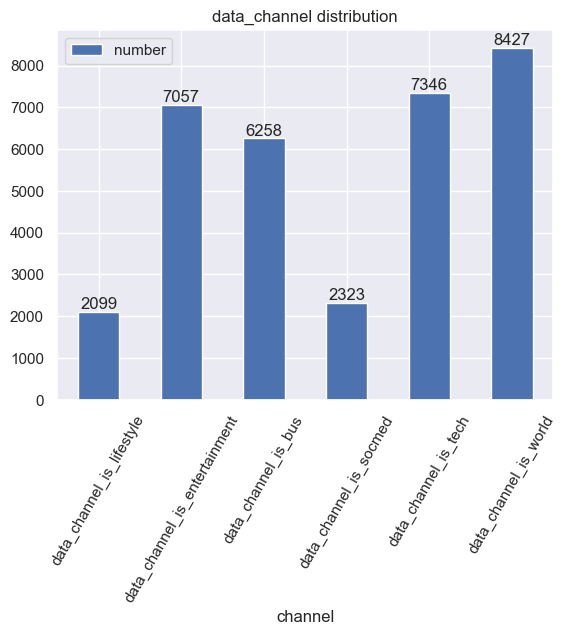

In [19]:
plt.figure(figsize=(7,5))
ax=data_channel.plot.bar(x='index',y='number',rot=60)
ax.set_title('data_channel distribution')
ax.set_xlabel('channel')
ax.bar_label((ax.containers[0]))
plt.show()

In [20]:
#weekday
data_week=raw_data[['weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend']]

data_week=data_week.sum().to_frame('number').reset_index()

<Figure size 700x500 with 0 Axes>

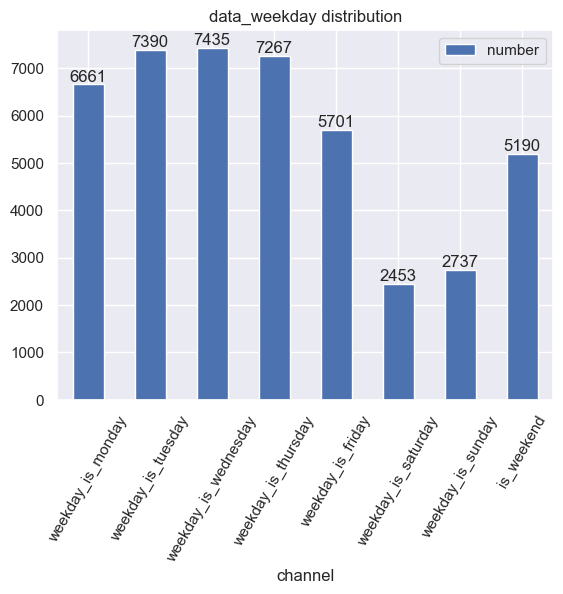

In [21]:
plt.figure(figsize=(7,5))
ax=data_week.plot.bar(x='index',y='number',rot=60)
ax.set_title('data_weekday distribution')
ax.set_xlabel('channel')
ax.bar_label((ax.containers[0]))
plt.show()

From the graph above, the attributes 'weekday_is_saturday','weekday_is_sunday' and 'is_weekend' are redundant, we will only keep 'is_weekend' to represent the other two. The dimension reduction operation will  execute at the end of EDA.

Boxplot helps ue to understand the numeric data distribution as well as find the outliers.

In [22]:
#boxplot to find the outlier
data_numeric=data_numeric=raw_data.drop( ['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend'],axis=1)

<AxesSubplot: >

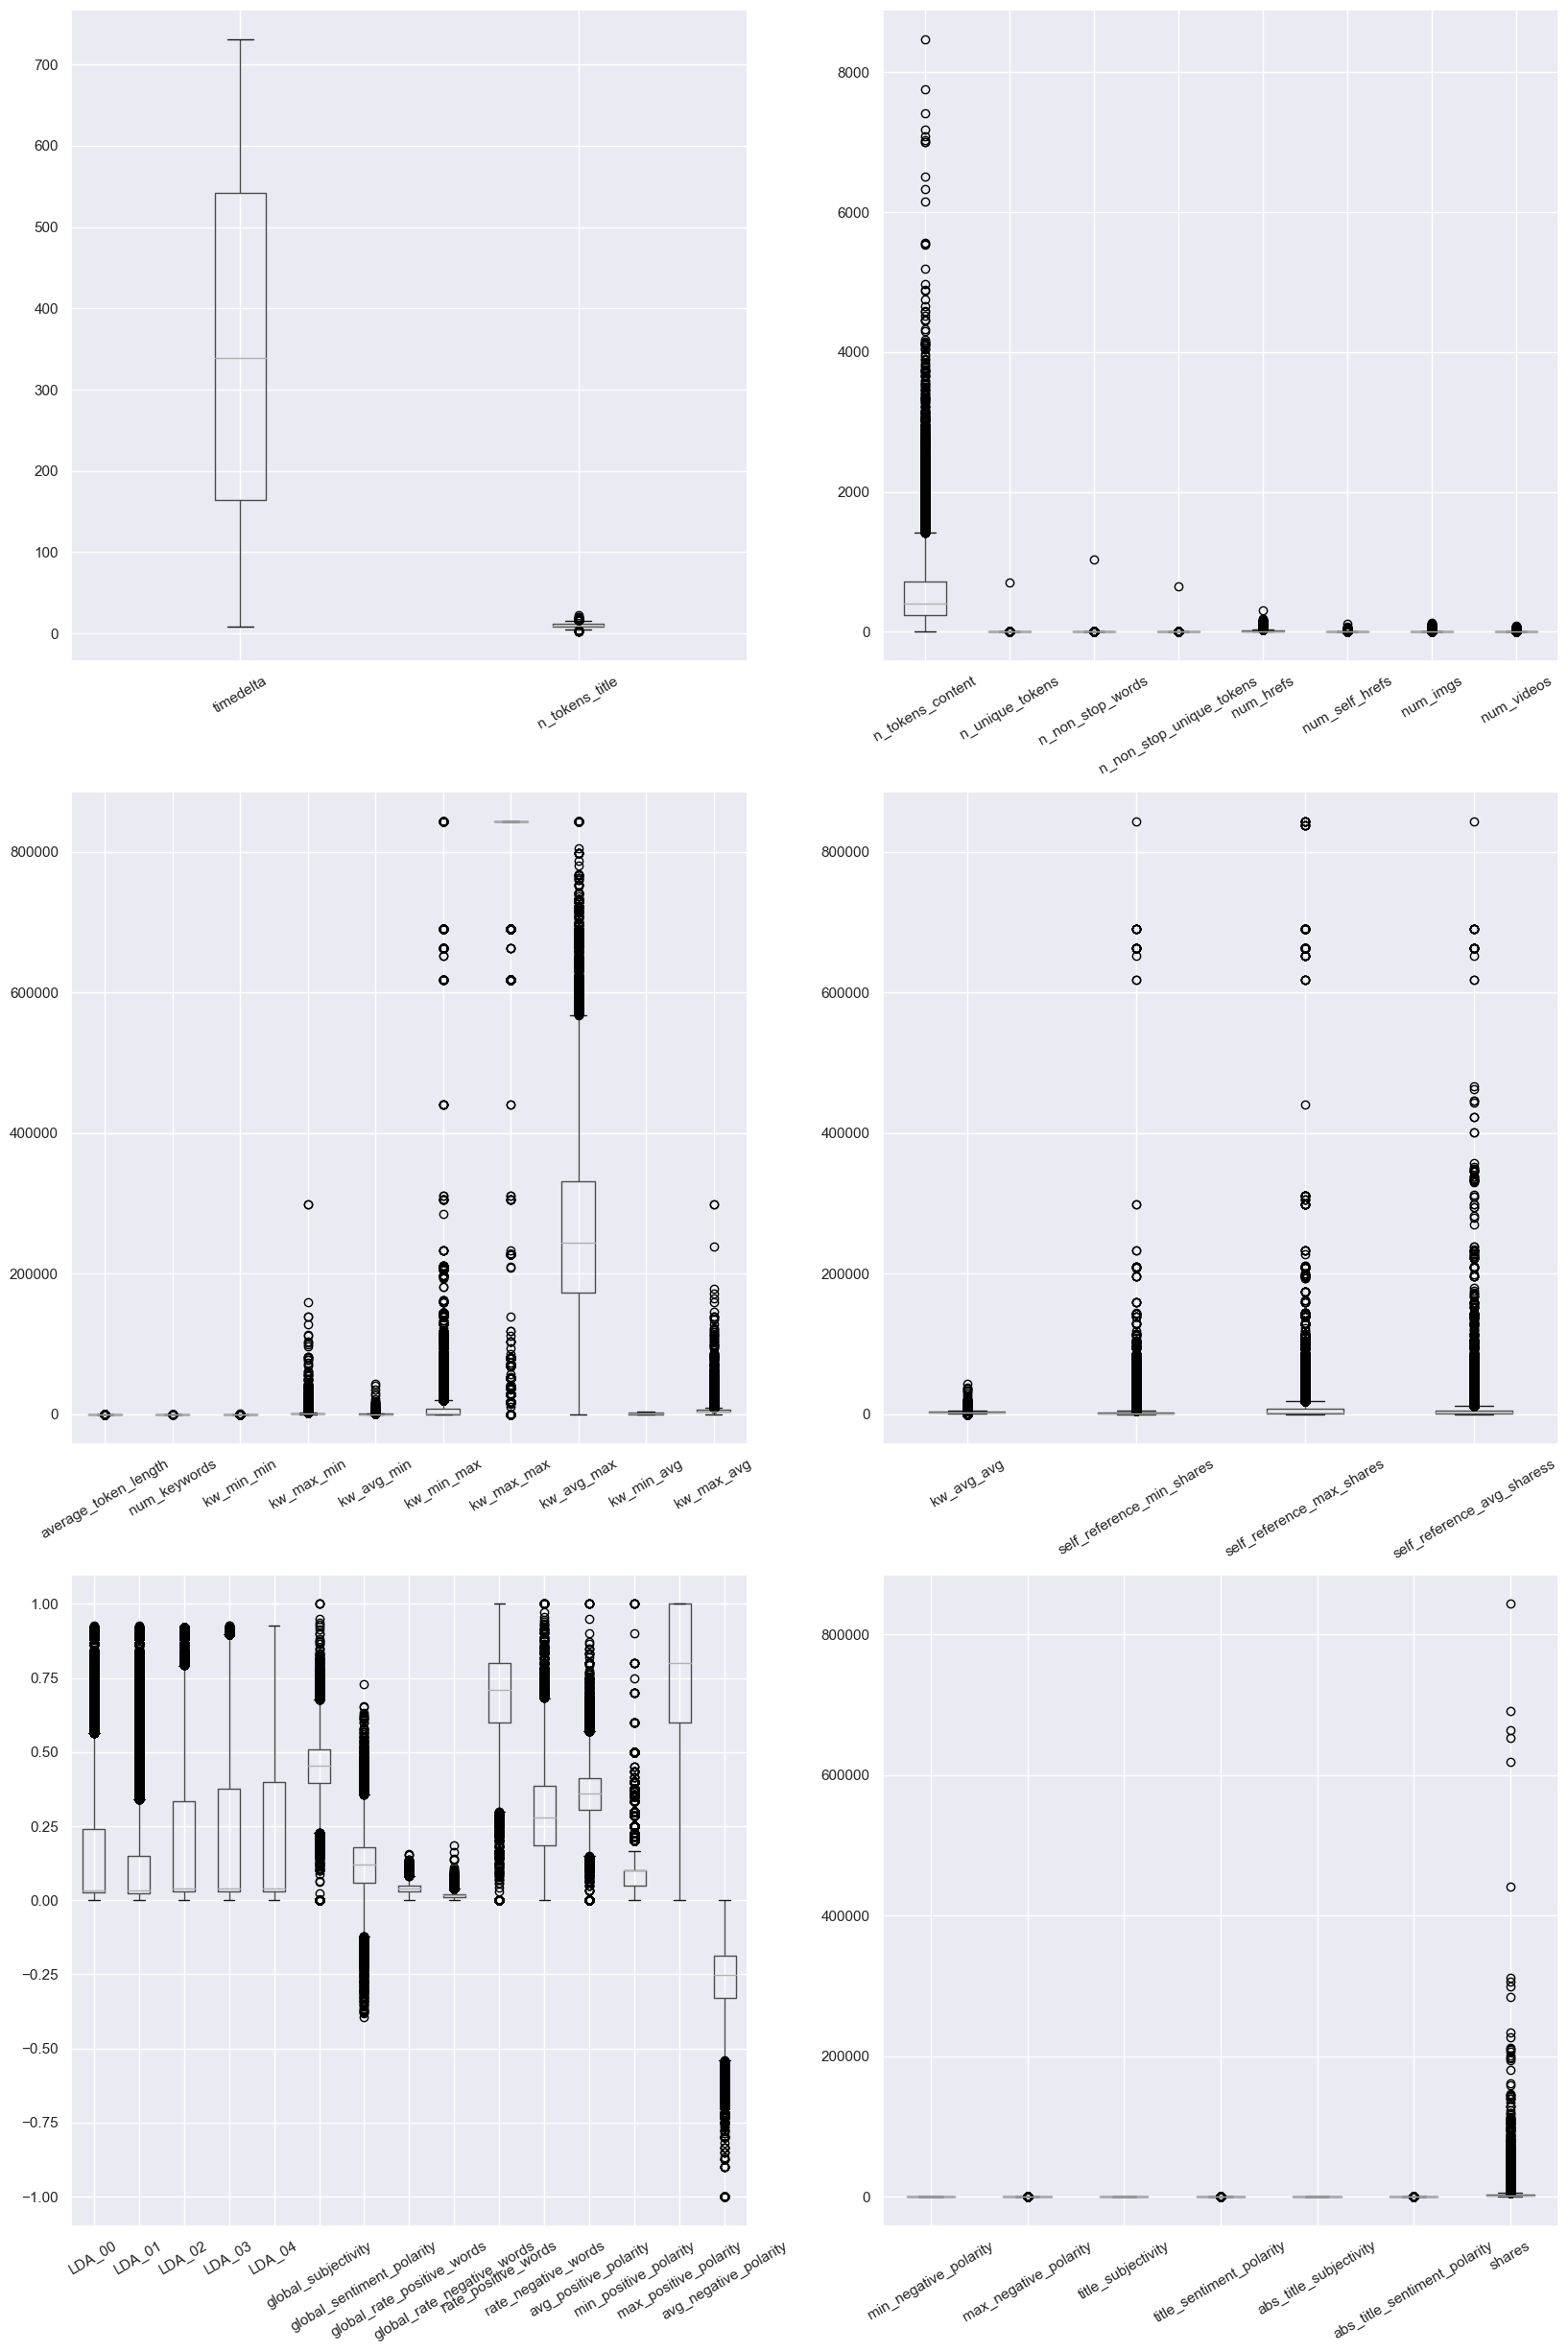

In [23]:
plt.figure(figsize=(20,30))

plt.subplot(321)
data_numeric.iloc[:,0:3].boxplot(rot=30)

plt.subplot(322)
data_numeric.iloc[:,3:11].boxplot(rot=30)

plt.subplot(323)
data_numeric.iloc[:,11:21].boxplot(rot=30)

plt.subplot(324)
data_numeric.iloc[:,21:25].boxplot(rot=30)

plt.subplot(325)
data_numeric.iloc[:,25:40].boxplot(rot=30)

plt.subplot(326)
data_numeric.iloc[:,40:].boxplot(rot=30)

Due to the different scale, the boxplot looks werid.

### 2. EDA

#### Correlation
First, we will compute correlation among attributes. As there are so many attributes, we will group similar attribute to compute the correlation.

In [22]:
raw_data.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive

From heatmap below, we will only keep 'abs_title_subjectivity','abs_title_sentiment_polarity'.

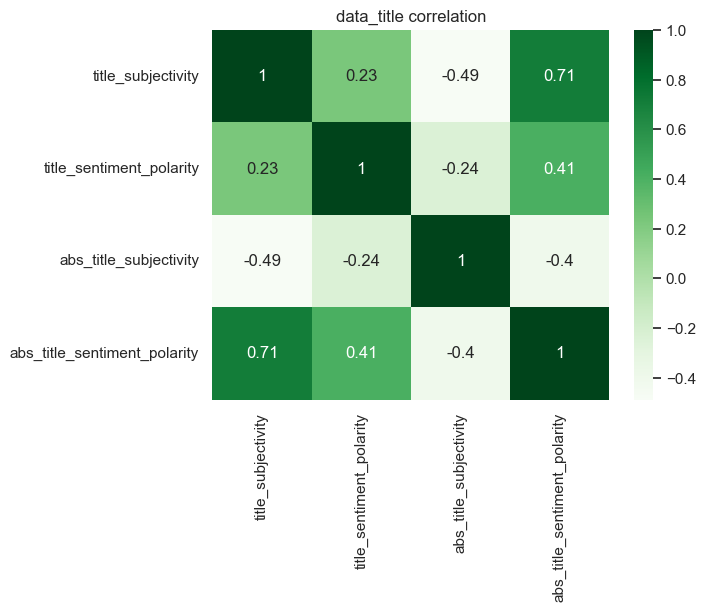

In [24]:
data_title=raw_data[['title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity']]

plt.figure()
ax=sns.heatmap(data_title.corr(),cmap='Greens',annot=True)
ax.set_title('data_title correlation')
plt.show()

we will keep 'n_tokens_title', 'n_tokens_content','n_unique_tokens'.

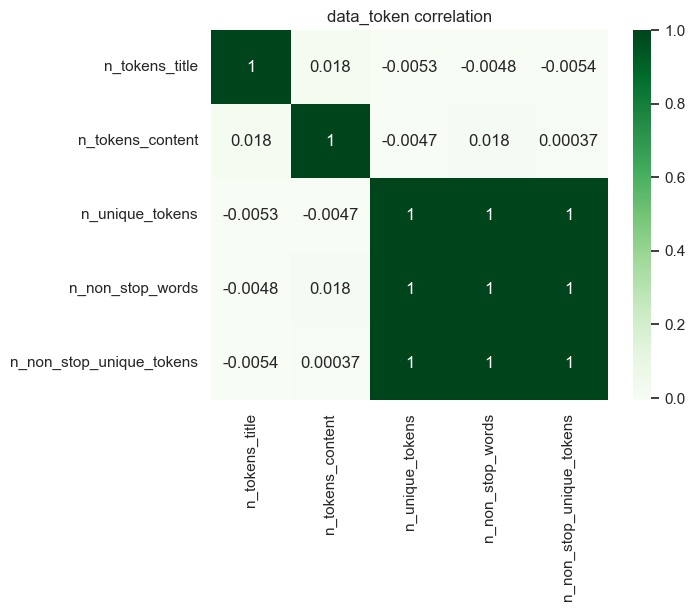

In [25]:
data_token=raw_data[['n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens']]

plt.figure()
ax=sns.heatmap(data_token.corr(),cmap='Greens',annot=True)
ax.set_title('data_token correlation')
plt.show()

We will drop 'num_self_hrefs', which is redundant.

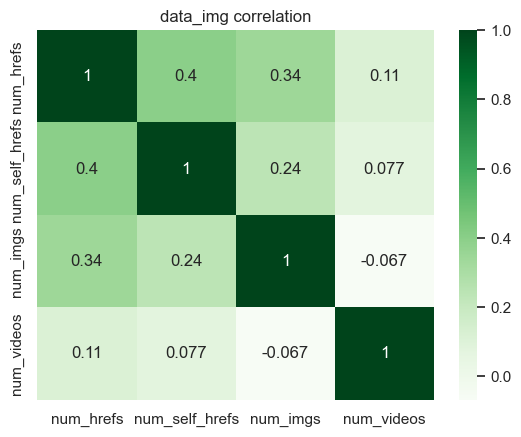

In [26]:
data_img=raw_data[['num_hrefs', 'num_self_hrefs', 'num_imgs',
       'num_videos']]

plt.figure()
ax=sns.heatmap(data_img.corr(),cmap='Greens',annot=True)
ax.set_title('data_img correlation')
plt.show()

Among various attributes for keyword, we will only keep 'kw_avg_max', which is the 'Best keyword'.

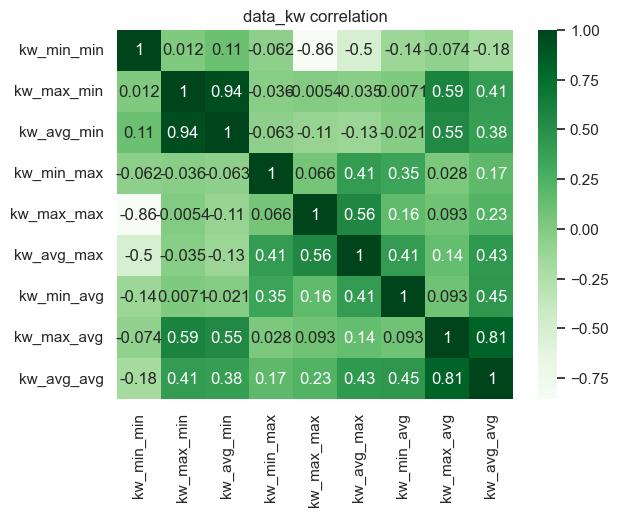

In [27]:
data_kw=raw_data[['kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg']]

plt.figure()
ax=sns.heatmap(data_kw.corr(),cmap='Greens',annot=True)#[ 'kw_avg_max']
ax.set_title('data_kw correlation')
plt.show()

we will only keep 'self_reference_avg_sharess'.

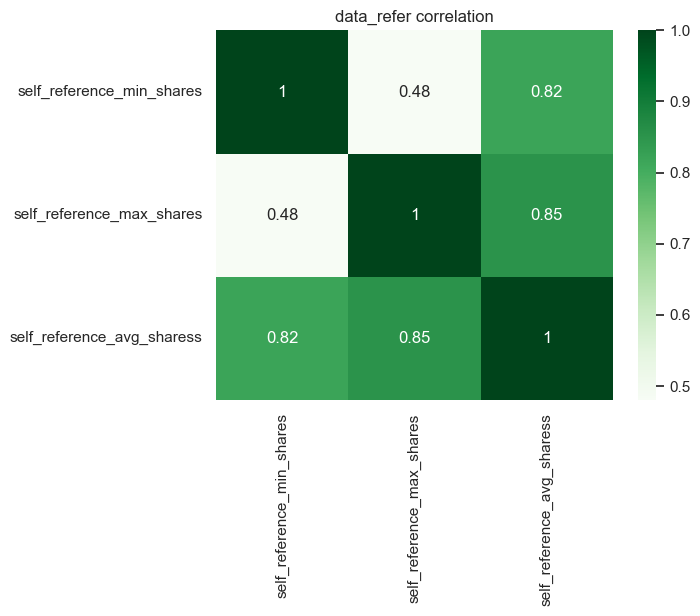

In [28]:
data_refer=raw_data[['self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess']]

plt.figure()
ax=sns.heatmap(data_refer.corr(),cmap='Greens',annot=True)# 'self_reference_avg_sharess'
ax.set_title('data_refer correlation')
plt.show()

We will only keep 'global_subjectivity'.

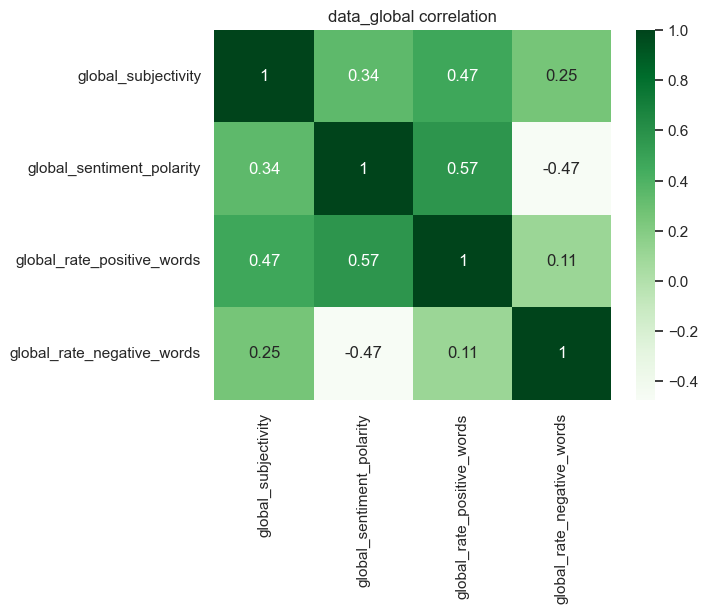

In [29]:
data_glob=raw_data[['global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words']]

plt.figure()
ax=sns.heatmap(data_glob.corr(),cmap='Greens',annot=True)
ax.set_title('data_global correlation')
plt.show()

we will keep 'avg_positive_polarity','avg_negative_polarity', which are Avg. polarity of positive words and Avg. polarity of negative words

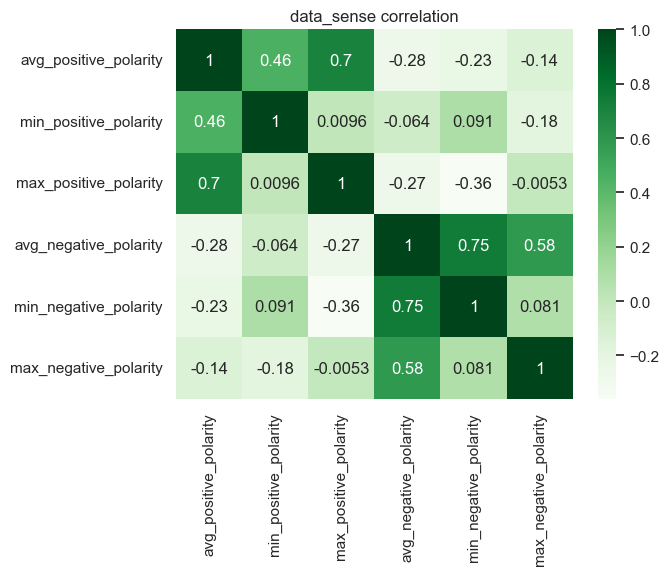

In [30]:
data_sense=raw_data[['avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity']]

plt.figure()
ax=sns.heatmap(data_sense.corr(),cmap='Greens',annot=True)#['avg_positive_polarity','avg_negative_polarity']
ax.set_title('data_sense correlation')
plt.show()

After computing correlation, we get a new dataset with necessary attributes below.

In [31]:
data_aftercor=raw_data.drop(['url', 'n_non_stop_words', 'n_non_stop_unique_tokens',
        'num_self_hrefs',  'average_token_length',
       'kw_max_max','kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 
        'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
      'weekday_is_saturday',
       'weekday_is_sunday',  'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 
       'min_positive_polarity', 'max_positive_polarity',
        'min_negative_polarity','avg_positive_polarity',
       'avg_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity'],axis=1)

In [32]:
data_aftercor.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,10.883690,4.544143,1.249874,7.223767,0.052946,0.178009,...,0.187544,0.183306,0.143805,0.130915,0.443370,0.682150,0.287934,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,11.332017,8.309434,4.107855,1.909130,0.223929,0.382525,...,0.390353,0.386922,0.350896,0.337312,0.116685,0.190206,0.156156,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,4.000000,1.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.396167,0.600000,0.185185,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,8.000000,1.000000,0.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.453457,0.710526,0.280000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,14.000000,4.000000,1.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.508333,0.800000,0.384615,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,304.000000,128.000000,91.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [33]:
%matplotlib inline

In [34]:
data_aftercor.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'num_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_avg_max', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'is_weekend',
       'global_subjectivity', 'rate_positive_words', 'rate_negative_words',
       'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares'],
      dtype='object')

In [35]:
data_temp=data_aftercor.copy()
for i in range(8,14):
  data_temp=data_temp.loc[data_temp.iloc[:,i]==0]
data_temp.iloc[:,8:14].value_counts()

data_channel_is_lifestyle  data_channel_is_entertainment  data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  data_channel_is_world
0.0                        0.0                            0.0                  0.0                     0.0                   0.0                      6134
dtype: int64

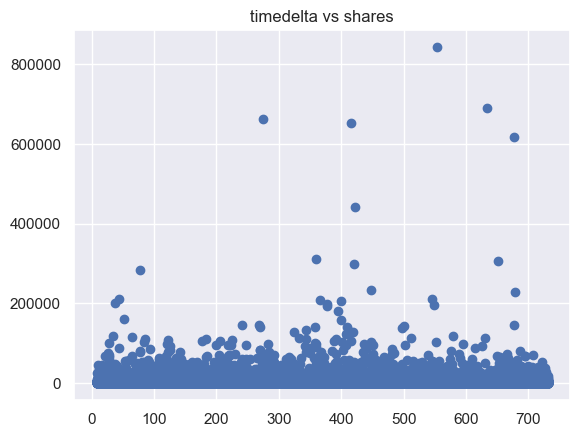

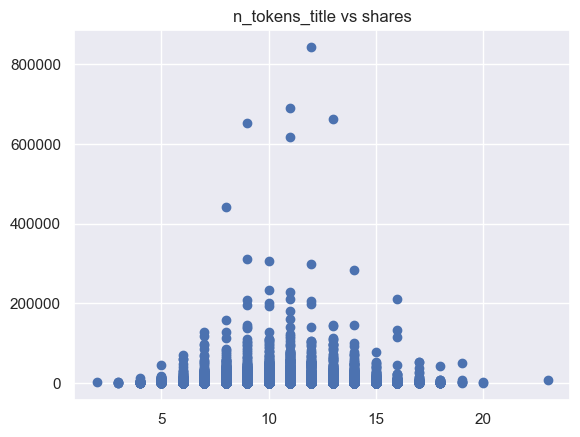

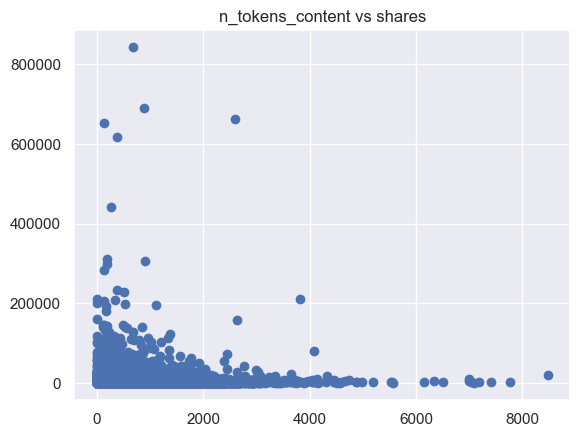

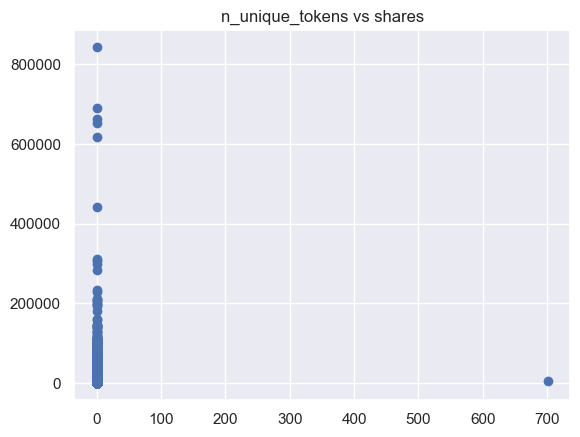

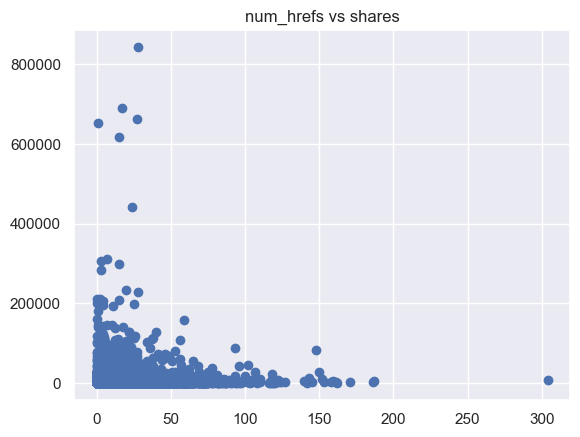

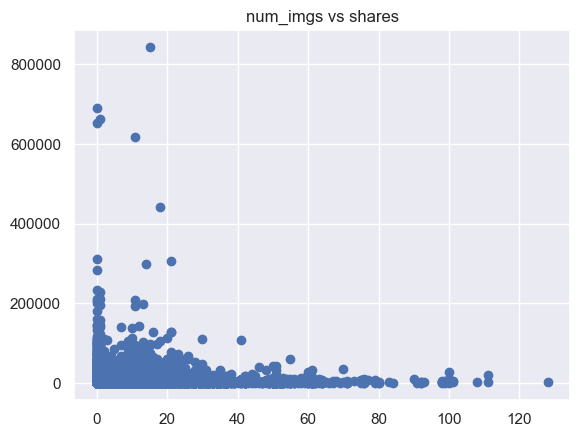

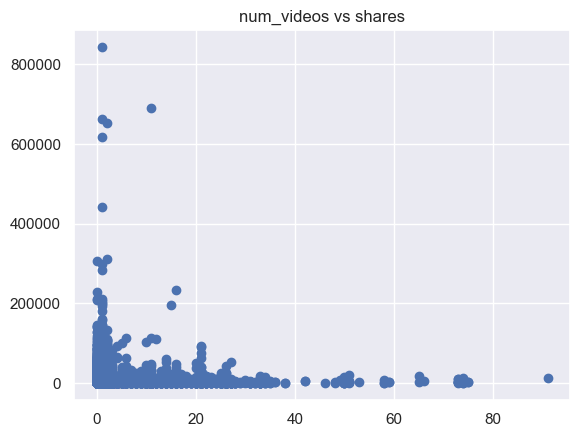

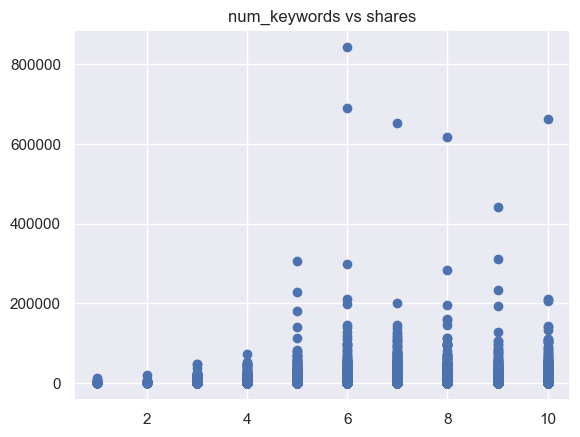

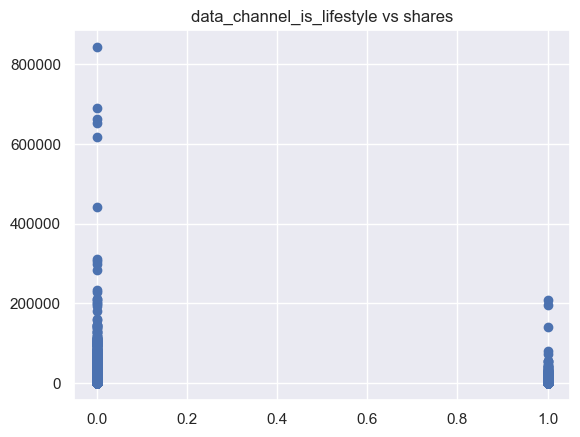

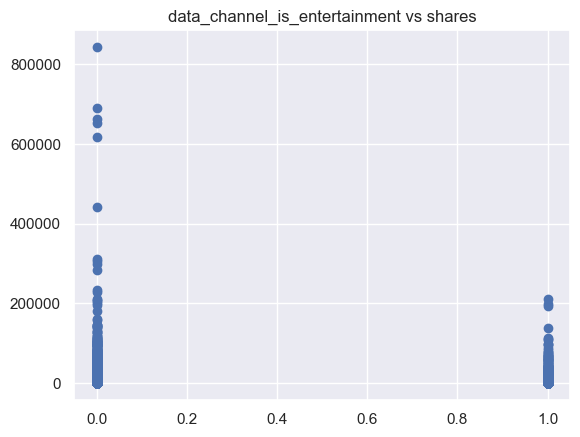

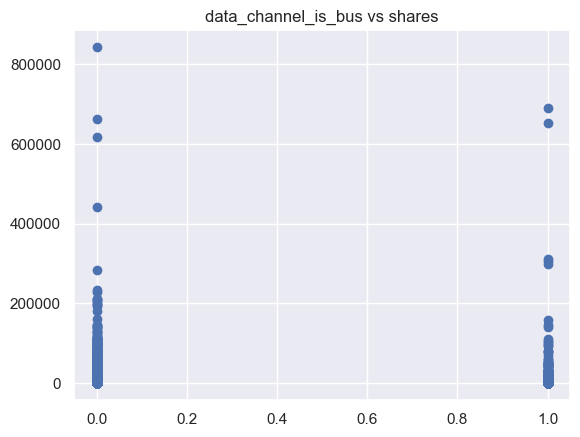

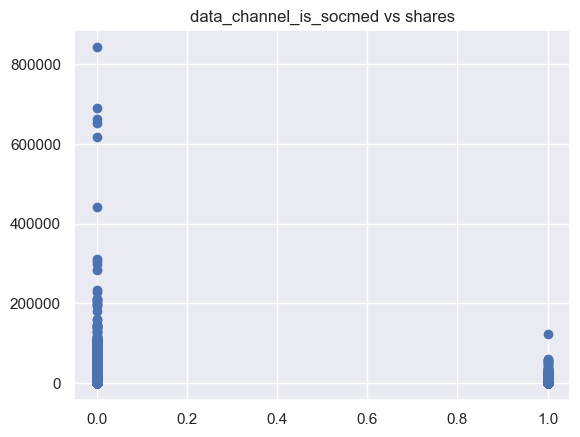

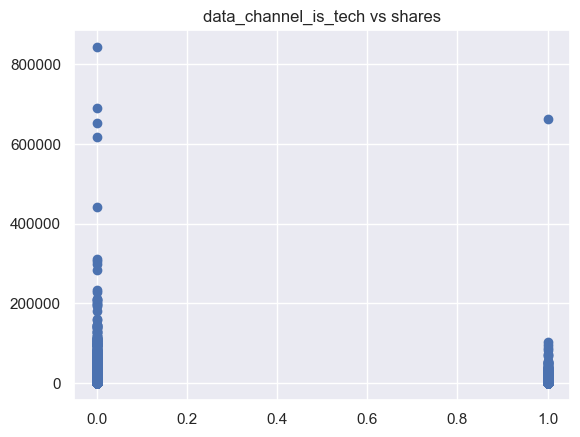

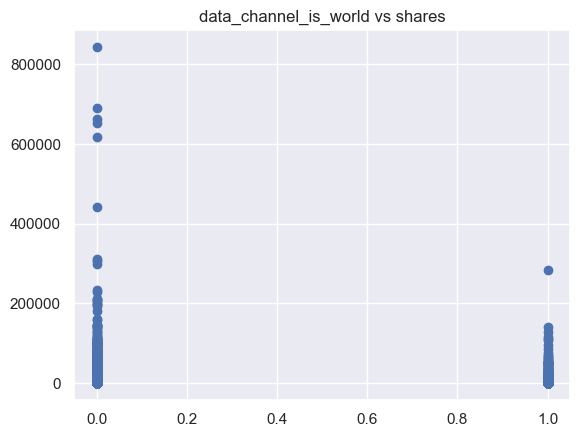

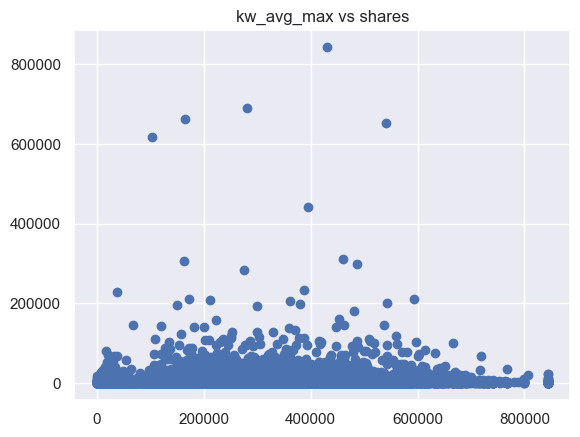

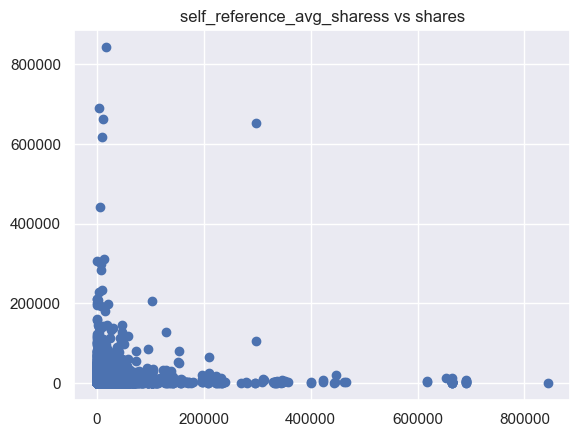

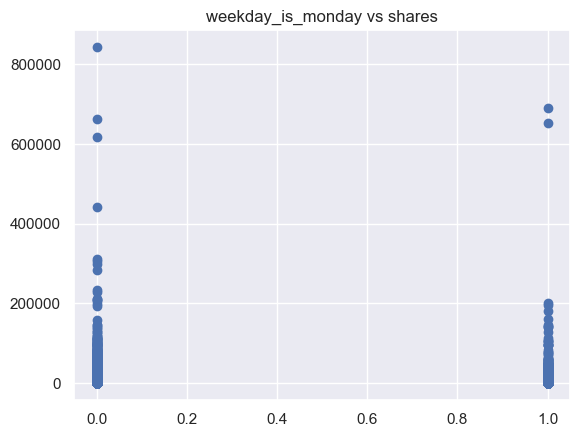

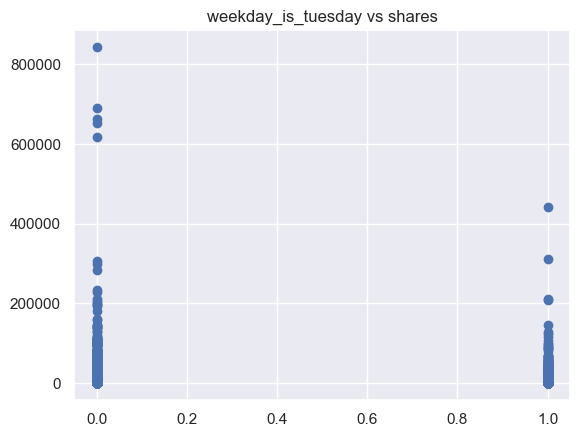

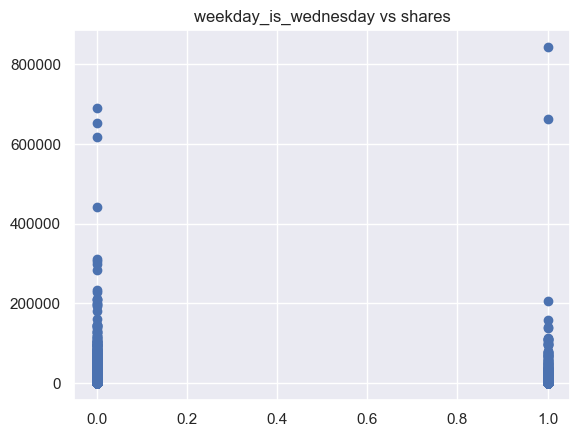

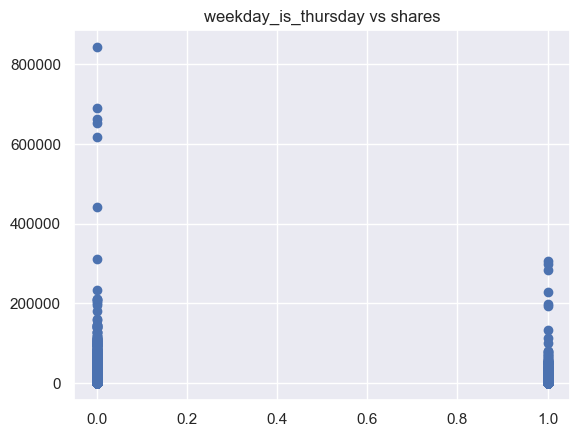

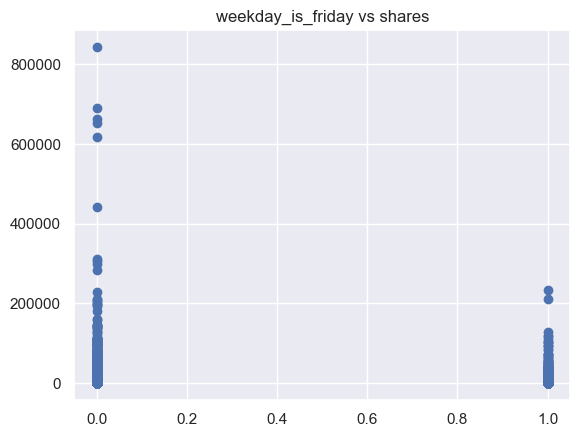

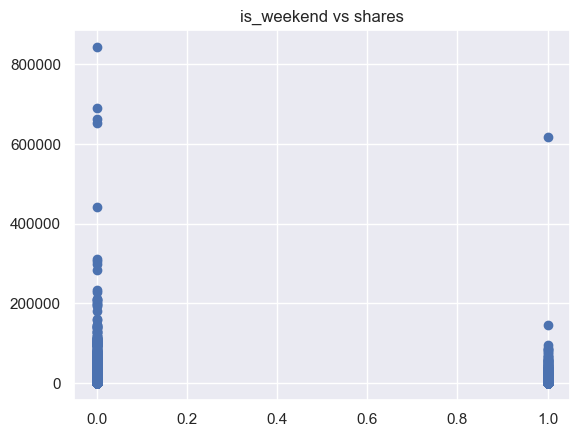

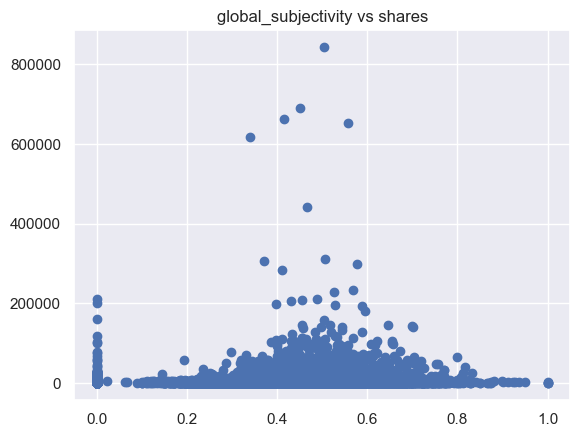

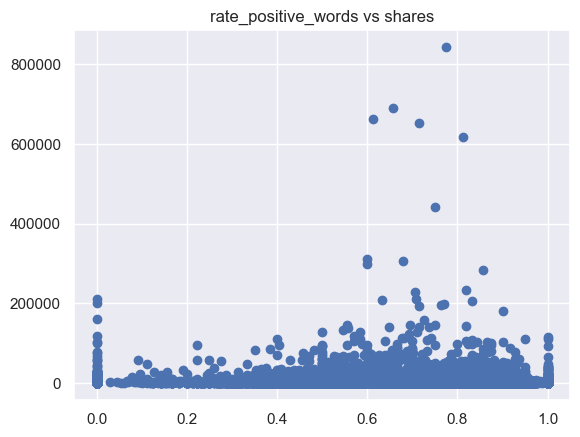

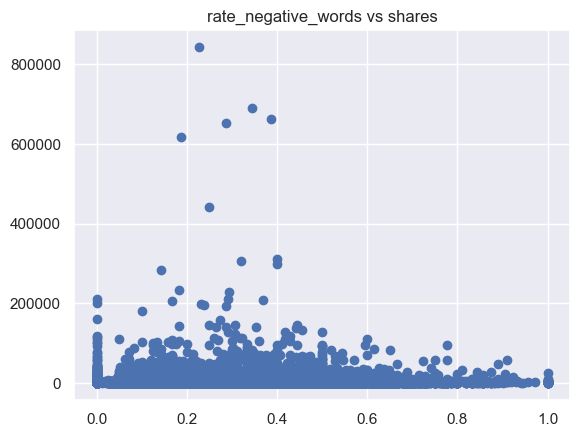

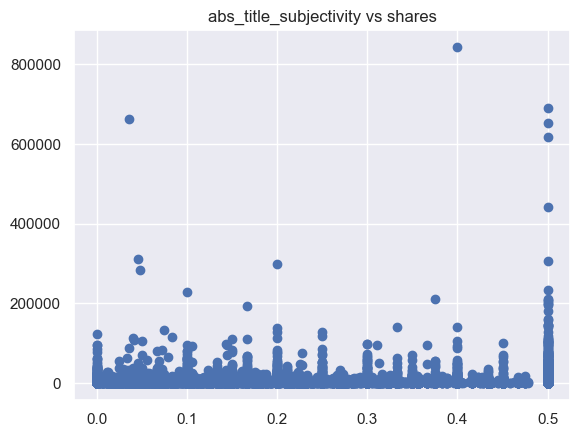

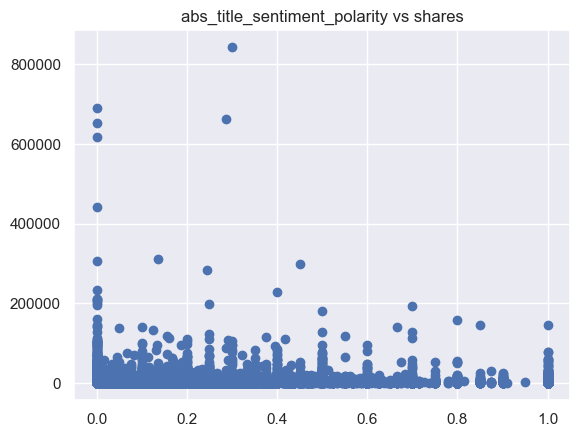

In [36]:
#bivariate analysis
for i in range(len(data_aftercor.columns)-1):
    plt.scatter(data_aftercor.iloc[:,i],data_aftercor.shares)
    name=data_aftercor.columns[i]
    plt.title(f'{name} vs shares')
    plt.show()

#### PCA
Before doing the Principal Components Analysis, We also utilize StandardScaler to standardize the dataset.

In [28]:
scaler = StandardScaler()
scaler.fit(data_aftercor)
data_scaler = scaler.transform(data_aftercor)

In [29]:
pca = PCA()
principal_components=pca.fit_transform(data_scaler)
#df.style.set_caption("Hello World")
print('pca.explained_variance_ratio')
print(pca.explained_variance_ratio_)
print('cumsum(pca.explained_variance_ratio)')
print(np.cumsum(pca.explained_variance_ratio_))

pca.explained_variance_ratio
[8.04225863e-02 6.95250949e-02 6.12718478e-02 5.19633410e-02
 4.66484593e-02 4.50519142e-02 4.39724235e-02 4.33874588e-02
 4.30086196e-02 4.21397143e-02 4.07007804e-02 4.02941077e-02
 3.90156275e-02 3.83105913e-02 3.73370703e-02 3.56831568e-02
 3.45734425e-02 3.36416840e-02 3.23702079e-02 2.98730162e-02
 2.62563101e-02 2.23159874e-02 2.03310886e-02 1.95118150e-02
 1.18410604e-02 6.73238489e-03 3.82020940e-03 1.58605586e-32]
cumsum(pca.explained_variance_ratio)
[0.08042259 0.14994768 0.21121953 0.26318287 0.30983133 0.35488324
 0.39885567 0.44224313 0.48525175 0.52739146 0.56809224 0.60838635
 0.64740198 0.68571257 0.72304964 0.75873279 0.79330624 0.82694792
 0.85931813 0.88919114 0.91544745 0.93776344 0.95809453 0.97760635
 0.98944741 0.99617979 1.         1.        ]


In [30]:
pca_df=pd.DataFrame()
for i in range(len(pca.components_.tolist())):
    pca_df['pc'+str(i+1)]=abs(pca.components_).tolist()[i]
    

In [31]:
pd.concat([pca_df.idxmax().to_frame().T,pca_df.max().to_frame().T], axis=0).reset_index(drop=True).rename(index={0: 'position',1:'value in eigenvector'})

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28
position,23.000000,2.000000,14.000000,25.000000,9.000000,19.000000,18.00000,16.000000,19.000000,20.000000,...,15.00000,1.000000,7.000000,2.000000,25.000000,4.000000,14.000000,23.000000,13.000000,18.000000
value in eigenvector,0.446459,0.428295,0.433555,0.548263,0.471082,0.397781,0.76964,0.593202,0.645385,0.801856,...,0.67787,0.652248,0.667632,0.499253,0.647738,0.722039,0.594134,0.593914,0.473137,0.428352


According to the PCA result, we could utilize the first 24 principle component to solve the problem and we also find out the specific feature contributes to that principal component.

### Milestone2

After initial EDA, we select 28 attributes for our problem, which covers significant infomation for each online news. Here is the latest dataset and new data dictionary.

In [50]:
data_m2=data_aftercor
data_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   num_hrefs                      39644 non-null  float64
 5   num_imgs                       39644 non-null  float64
 6   num_videos                     39644 non-null  float64
 7   num_keywords                   39644 non-null  float64
 8   data_channel_is_lifestyle      39644 non-null  float64
 9   data_channel_is_entertainment  39644 non-null  float64
 10  data_channel_is_bus            39644 non-null  float64
 11  data_channel_is_socmed         39644 non-null  float64
 12  data_channel_is_tech           39644 non-null 

In [51]:
new_data_dic=data_dic.loc[[ '     1. timedelta',
 '     2. n_tokens_title',
 '     3. n_tokens_content',
 '     4. n_unique_tokens',
 '     7. num_hrefs',
 '     9. num_imgs',
 '    10. num_videos',
 '    12. num_keywords',
 '    13. data_channel_is_lifestyle',
 '    14. data_channel_is_entertainment',
 '    15. data_channel_is_bus',
 '    16. data_channel_is_socmed',
 '    17. data_channel_is_tech',
 '    18. data_channel_is_world',
 '    24. kw_avg_max',
 '    30. self_reference_avg_sharess',
 '    31. weekday_is_monday',
 '    32. weekday_is_tuesday',
 '    33. weekday_is_wednesday',
 '    34. weekday_is_thursday',
 '    35. weekday_is_friday',
 '    38. is_weekend',
 '    44. global_subjectivity',
 '    48. rate_positive_words',
 '    49. rate_negative_words',
 '    58. abs_title_subjectivity',
 '    59. abs_title_sentiment_polarity',
 '    60. shares'],:]
new_data_dic

,Attribute Information,Datatype,Missing_value,Example
Attribute,,,,
1. timedelta,Days between the article ...,float64,0,731.0
2. n_tokens_title,Number of words in the title,float64,0,12.0
3. n_tokens_content,Number of words in the content,float64,0,219.0
4. n_unique_tokens,Rate of unique words in the con...,float64,0,0.663594
7. num_hrefs,Number of links,float64,0,4.0
9. num_imgs,Number of images,float64,0,1.0
10. num_videos,Number of videos,float64,0,0.0
12. num_keywords,Number of keywords in the me...,float64,0,5.0
13. data_channel_is_lifestyle,Is data channel 'Lifestyle'?,float64,0,0.0


## Milestone3

* Feature engineering
* Feature selection
* Recommend the list of features for your problem

## Feature Engineering

In [52]:
#category distribution
#data_channal
data_channal=data_m2[['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']]

data_channel=data_channal.sum().to_frame('number').reset_index()

<Figure size 700x500 with 0 Axes>

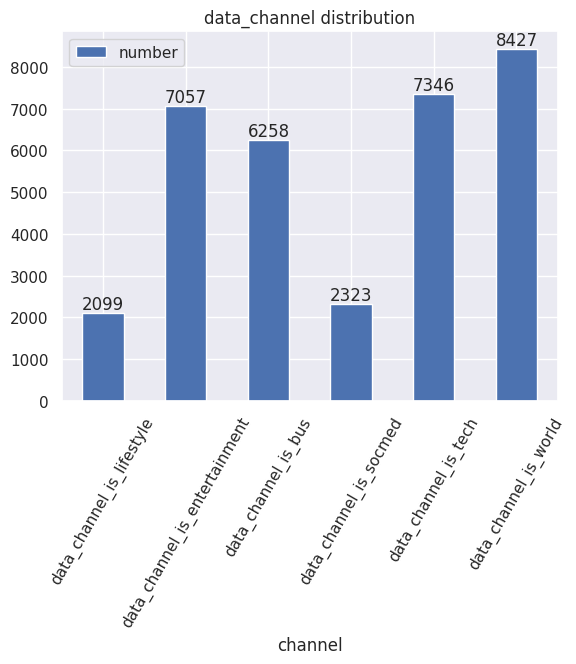

In [53]:
plt.figure(figsize=(7,5))
ax=data_channel.plot.bar(x='index',y='number',rot=60)
ax.set_title('data_channel distribution')
ax.set_xlabel('channel')
ax.bar_label((ax.containers[0]))
plt.show()

In [54]:
#weekday
data_week=data_m2[['weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday','is_weekend']]

data_week=data_week.sum().to_frame('number').reset_index()

<Figure size 700x500 with 0 Axes>

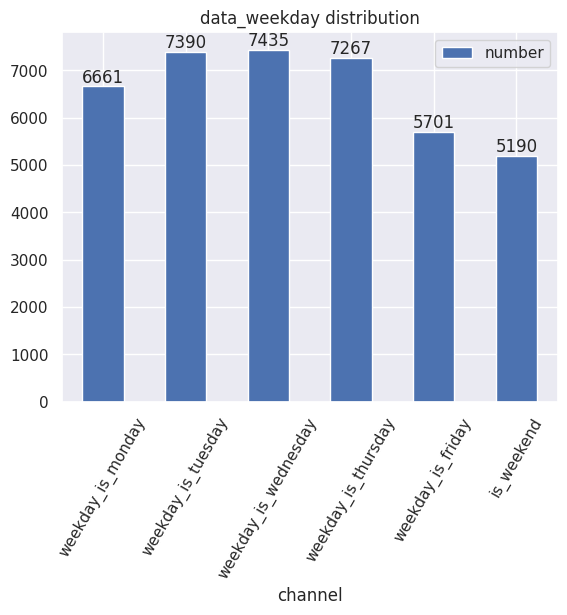

In [55]:
plt.figure(figsize=(7,5))
ax=data_week.plot.bar(x='index',y='number',rot=60)
ax.set_title('data_weekday distribution')
ax.set_xlabel('channel')
ax.bar_label((ax.containers[0]))
plt.show()

In [ ]:
#combine lifestyle and social media

In [56]:
data_channal=data_m2[['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']]
data_channal['data_channel_is_combo']=data_channal['data_channel_is_lifestyle']+data_channal['data_channel_is_socmed']
data_channal

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,data_channel_is_combo
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
39639,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39640,0.0,0.0,0.0,1.0,0.0,0.0,1.0
39641,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39642,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
temp_insert=data_m2['data_channel_is_lifestyle']+data_m2['data_channel_is_socmed']
insert_m2=pd.DataFrame({'data_channel_is_combo':temp_insert})

In [58]:
data_m2.insert (13, 'data_channel_is_combo',insert_m2)
data_combine=data_m2.drop(columns=['data_channel_is_lifestyle', 'data_channel_is_socmed'])

In [59]:
data_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   num_hrefs                      39644 non-null  float64
 5   num_imgs                       39644 non-null  float64
 6   num_videos                     39644 non-null  float64
 7   num_keywords                   39644 non-null  float64
 8   data_channel_is_entertainment  39644 non-null  float64
 9   data_channel_is_bus            39644 non-null  float64
 10  data_channel_is_tech           39644 non-null  float64
 11  data_channel_is_combo          39644 non-null  float64
 12  data_channel_is_world          39644 non-null 

In [60]:
data_channal=data_combine[[ 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_combo',
       'data_channel_is_tech', 'data_channel_is_world']]

data_channel=data_channal.sum().to_frame('number').reset_index()

<Figure size 700x500 with 0 Axes>

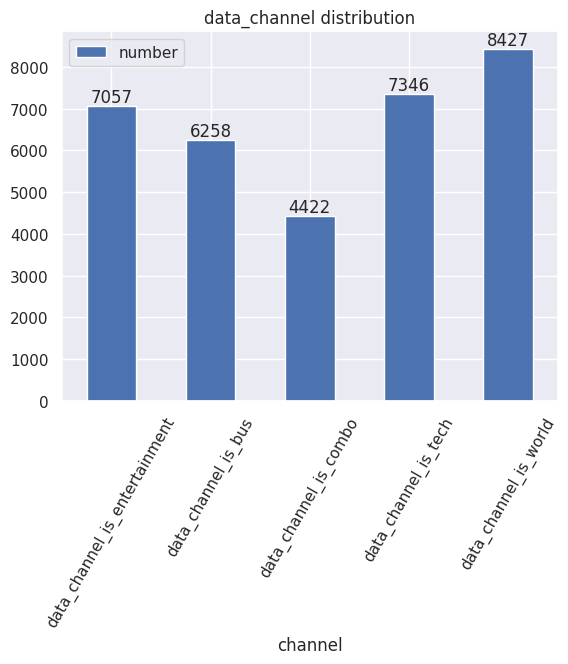

In [61]:
plt.figure(figsize=(7,5))
ax=data_channel.plot.bar(x='index',y='number',rot=60)
ax.set_title('data_channel distribution')
ax.set_xlabel('channel')
ax.bar_label((ax.containers[0]))
plt.show()

In [62]:
data_channel=['data_channel_is_lifestyle', 'data_channel_is_entertainment','data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']
data_weekday=['weekday_is_monday','weekday_is_tuesday', 'weekday_is_wednesday','weekday_is_thursday', 
              'weekday_is_friday','is_weekend']

In [63]:
len(data_m2[(data_m2['data_channel_is_lifestyle']==1)&(data_m2['weekday_is_friday']==1)].index)

305

In [64]:
#everyweekday distribution among topic#move this part to the EDA
df_temp=pd.DataFrame()
for i in range(len(data_weekday)):
    for j in range(len(data_channel)):
        num=len(data_m2[(data_m2[data_channel[j]]==1)&(data_m2[data_weekday[i]]==1)].index)
        df_temp.loc[data_weekday[i],data_channel[j]]=num

In [24]:
%matplotlib inline 

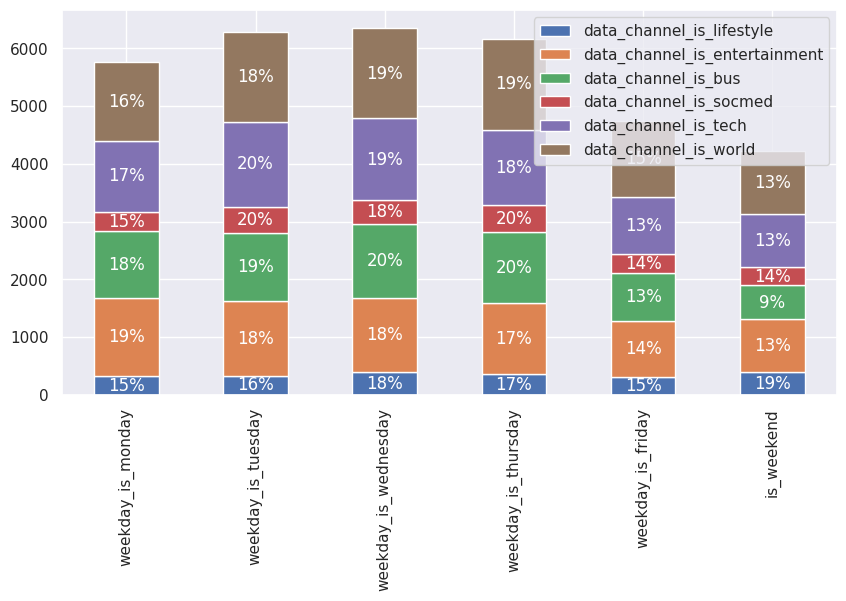

In [65]:
ax=df_temp.plot(kind='bar',stacked=True,figsize=(10,5))

df_percent=df_temp/df_temp.sum()

labels = [f'{i:.0%}' for i in df_percent.to_numpy().flatten(order='F')]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='white')
    
plt.show()

### remove outliers

In [66]:
data_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   num_hrefs                      39644 non-null  float64
 5   num_imgs                       39644 non-null  float64
 6   num_videos                     39644 non-null  float64
 7   num_keywords                   39644 non-null  float64
 8   data_channel_is_entertainment  39644 non-null  float64
 9   data_channel_is_bus            39644 non-null  float64
 10  data_channel_is_tech           39644 non-null  float64
 11  data_channel_is_combo          39644 non-null  float64
 12  data_channel_is_world          39644 non-null 

In [36]:
data_combine.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,num_keywords,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,10.883690,4.544143,1.249874,7.223767,0.178009,0.157855,...,0.187544,0.183306,0.143805,0.130915,0.443370,0.682150,0.287934,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,11.332017,8.309434,4.107855,1.909130,0.382525,0.364610,...,0.390353,0.386922,0.350896,0.337312,0.116685,0.190206,0.156156,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,4.000000,1.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.396167,0.600000,0.185185,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,8.000000,1.000000,0.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.453457,0.710526,0.280000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,14.000000,4.000000,1.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.508333,0.800000,0.384615,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,304.000000,128.000000,91.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [85]:
data_outlier=data_combine

In [86]:
for i in['n_tokens_content','num_hrefs','num_imgs','num_videos','kw_avg_max','self_reference_avg_sharess',
         'rate_positive_words','rate_negative_words','global_subjectivity','abs_title_sentiment_polarity']:
    Q1 = data_outlier[i].quantile(0.25)
    Q3 = data_outlier[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (data_outlier[i] >= Q1 - 1.5 * IQR) & (data_outlier[i] <= Q3 + 1.5 *IQR)
    data_outlier=data_outlier.loc[filter]  

In [97]:
Q1 = data_outlier.shares.quantile(0.1)
Q3 = data_outlier.shares.quantile(0.9)
IQR=Q3-Q1
data_outlier=data_outlier.loc[data_outlier.shares<=Q3+3*IQR]

In [98]:
data_afterout=data_outlier.reset_index(drop=True)

In [99]:
data_afterout.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,num_keywords,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,...,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000
mean,367.385114,10.388596,457.200513,0.563828,7.762973,1.204188,0.332979,7.107898,0.151811,0.210282,...,0.193887,0.187648,0.144605,0.114620,0.440590,0.712376,0.287624,0.344200,0.104570,2000.077284
std,220.599706,2.108521,284.486335,0.092655,4.813002,1.094224,0.575523,1.906301,0.358846,0.407519,...,0.395351,0.390440,0.351711,0.318571,0.077389,0.143192,0.143192,0.190643,0.151756,2081.869676
min,8.000000,3.000000,18.000000,0.303216,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.230769,0.323529,0.000000,0.000000,0.000000,5.000000
25%,167.000000,9.000000,243.000000,0.497496,4.000000,1.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.388589,0.617647,0.189189,0.154167,0.000000,885.000000
50%,359.000000,10.000000,376.000000,0.557325,7.000000,1.000000,0.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.441530,0.716667,0.283333,0.500000,0.000000,1300.000000
75%,570.000000,12.000000,609.000000,0.620690,10.000000,1.000000,1.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.492548,0.810811,0.382353,0.500000,0.168182,2200.000000
max,731.000000,23.000000,1421.000000,1.000000,26.000000,6.000000,2.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.655699,1.000000,0.676471,0.500000,0.500000,15900.000000


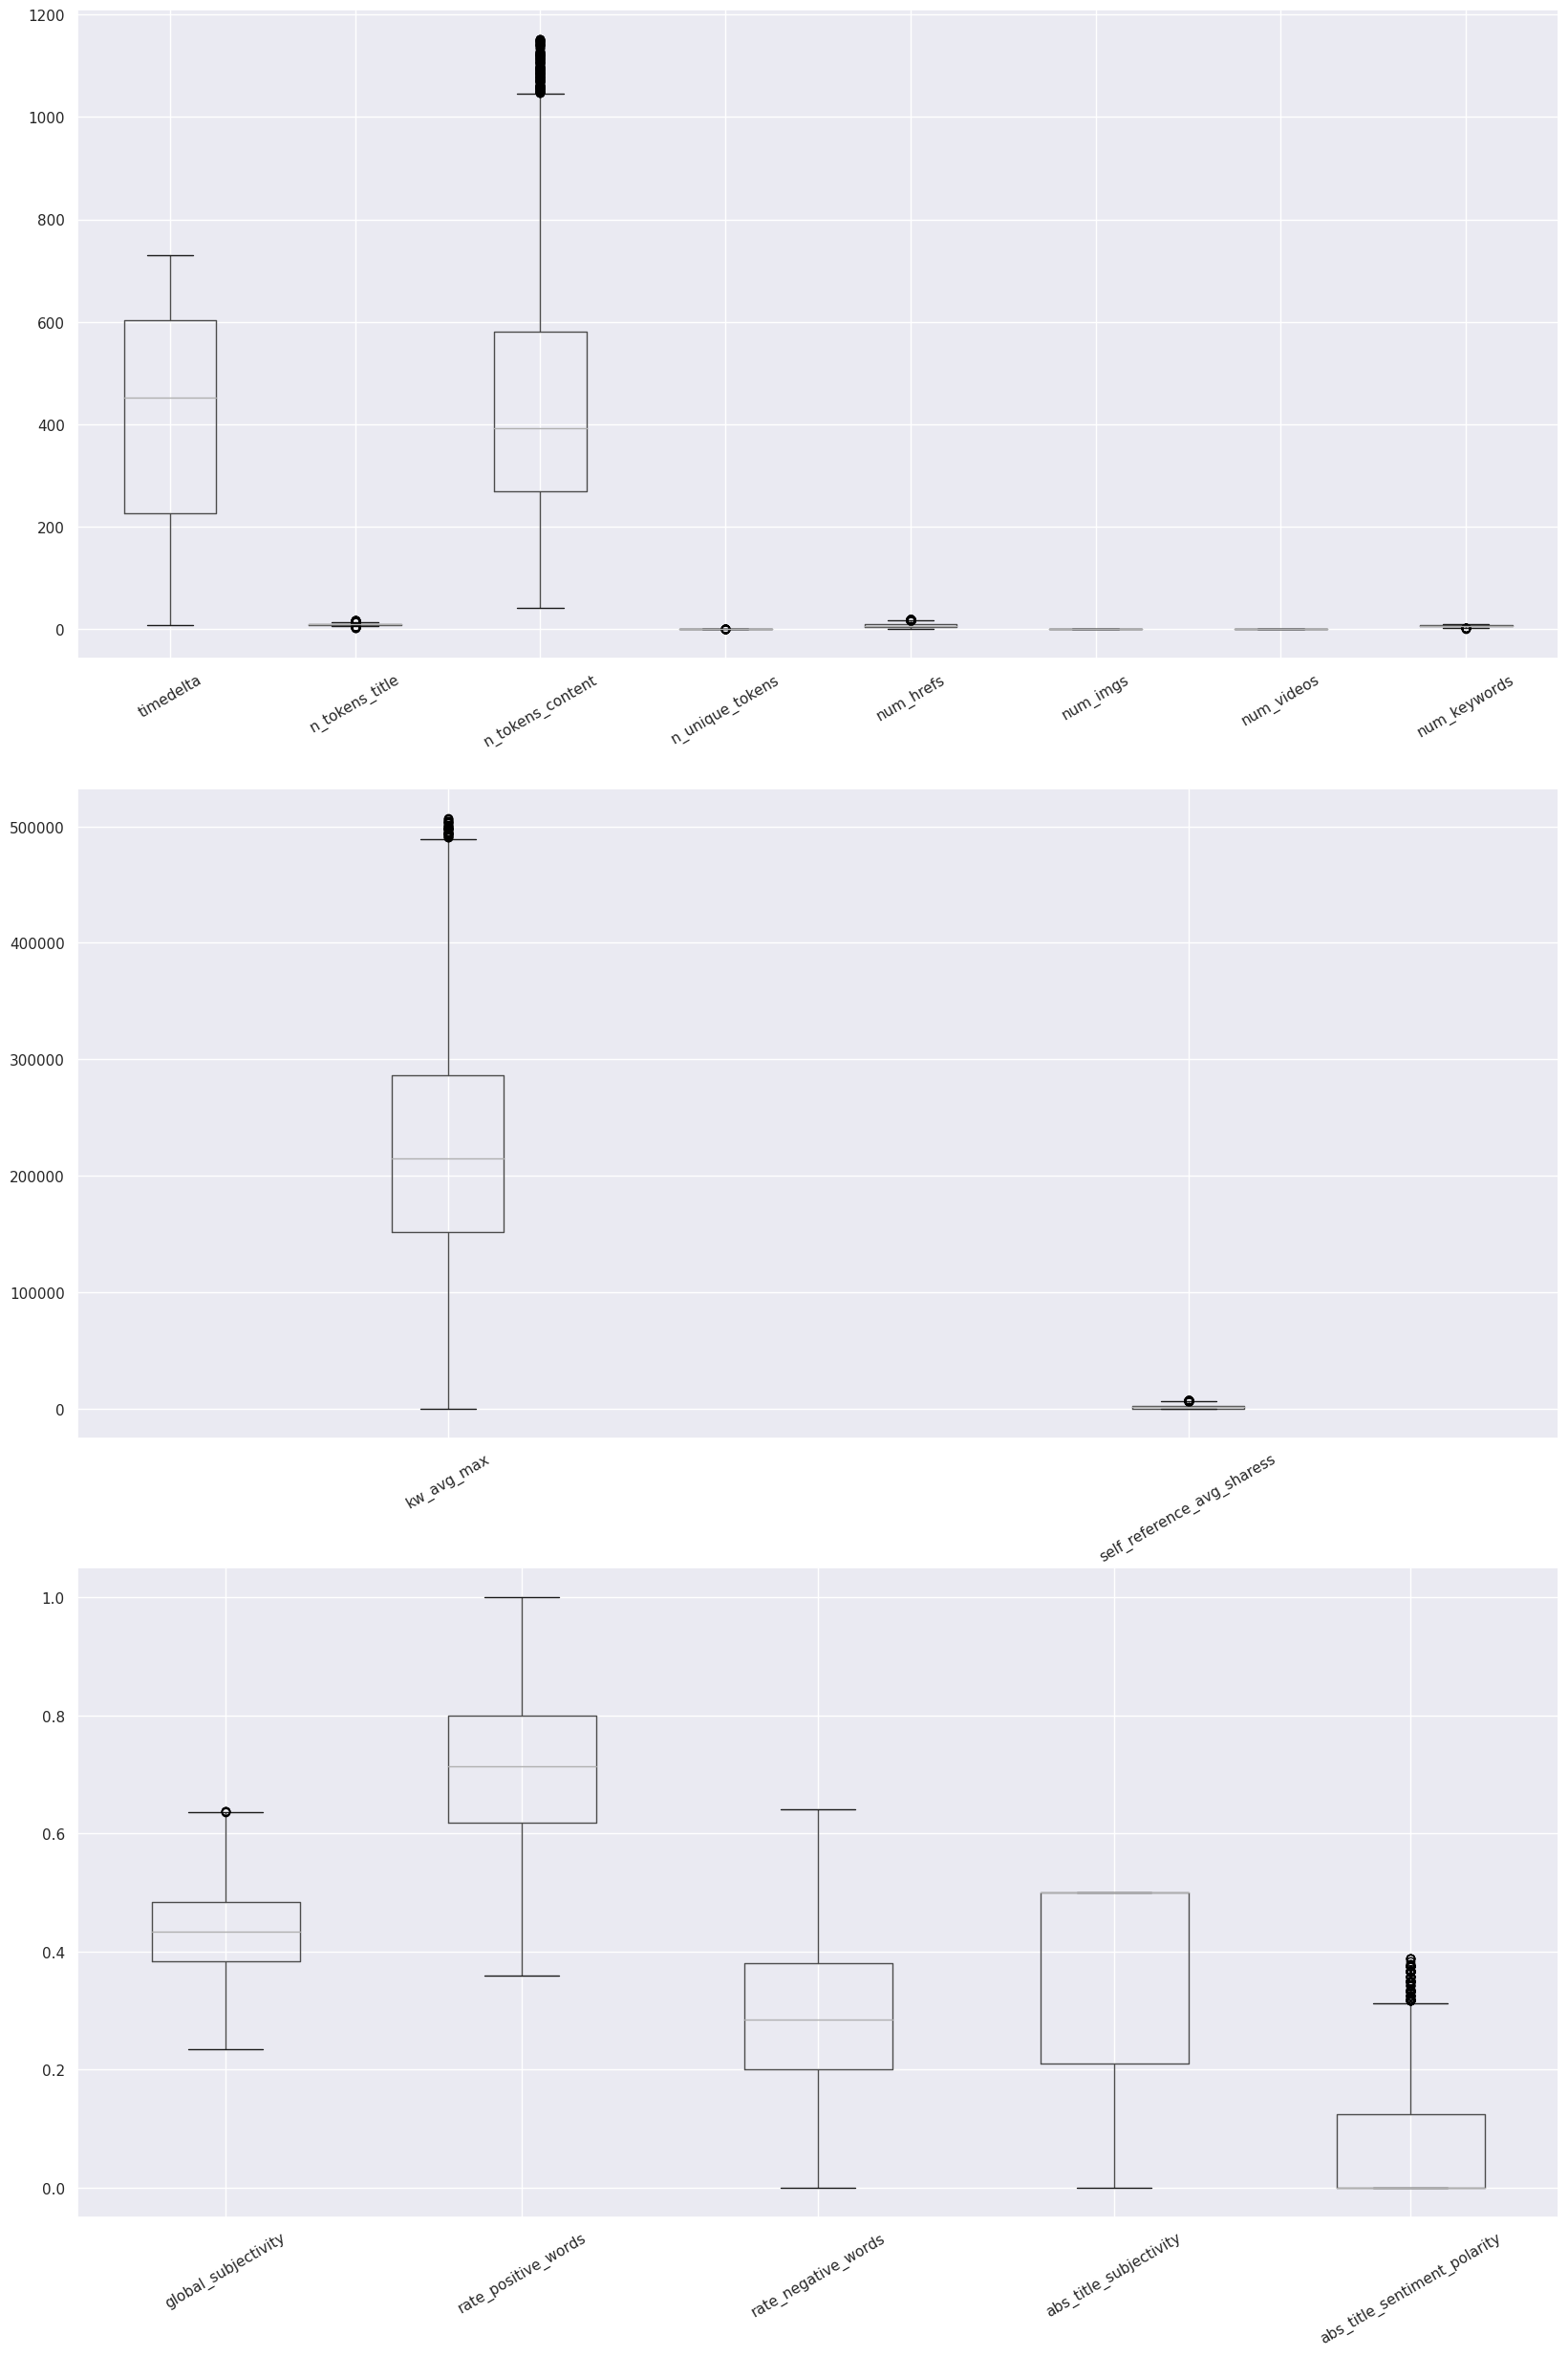

In [77]:
plt.figure(figsize=(20,30))

plt.subplot(311)
data_afterout.iloc[:,0:8].boxplot(rot=30)

plt.subplot(312)
data_afterout.iloc[:,13:15].boxplot(rot=30)

plt.subplot(313)
data_afterout.iloc[:,21:26].boxplot(rot=30)


plt.show()

In [101]:
data_time=data_afterout[(data_afterout['timedelta']>=30)&(data_afterout['timedelta']<=90)]
data_time.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_imgs,num_videos,num_keywords,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,2114.000000,2114.000000,2114.000000,2114.000000,2114.00000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,...,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000
mean,60.494324,11.132450,527.946547,0.540562,8.07947,1.592242,0.426679,6.848155,0.166982,0.161779,...,0.169347,0.164144,0.151372,0.128666,0.438782,0.687665,0.312335,0.339966,0.107214,1772.795648
std,17.152229,2.171636,295.369078,0.081787,5.27496,1.268966,0.624146,1.850577,0.373048,0.368335,...,0.375147,0.370494,0.358496,0.334909,0.076780,0.138434,0.138434,0.190180,0.150082,1817.587813
min,30.000000,3.000000,24.000000,0.335463,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.240909,0.333333,0.000000,0.000000,0.000000,22.000000
25%,47.000000,10.000000,299.000000,0.481636,4.00000,1.000000,0.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.387824,0.600000,0.216717,0.153125,0.000000,863.000000
50%,61.000000,11.000000,452.000000,0.535183,7.00000,1.000000,0.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.442114,0.692308,0.307692,0.500000,0.000000,1200.000000
75%,76.000000,13.000000,697.750000,0.592044,11.00000,2.000000,1.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.490005,0.783283,0.400000,0.500000,0.187500,1900.000000
max,90.000000,19.000000,1421.000000,1.000000,26.00000,6.000000,2.000000,10.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.655082,1.000000,0.666667,0.500000,0.500000,15900.000000


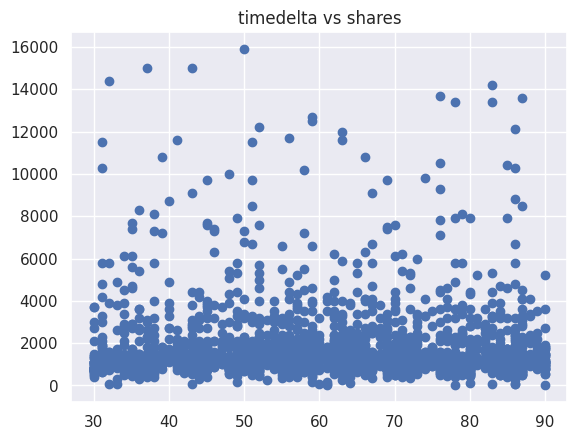

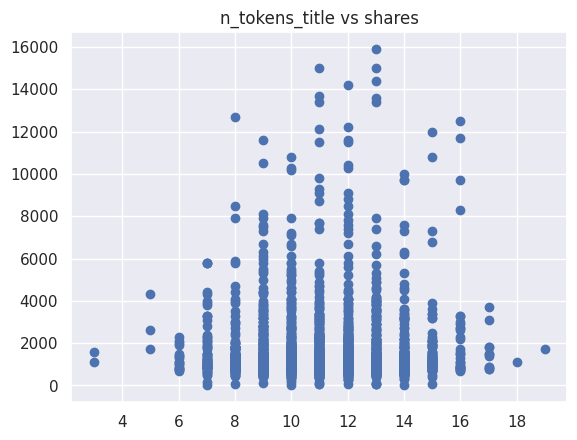

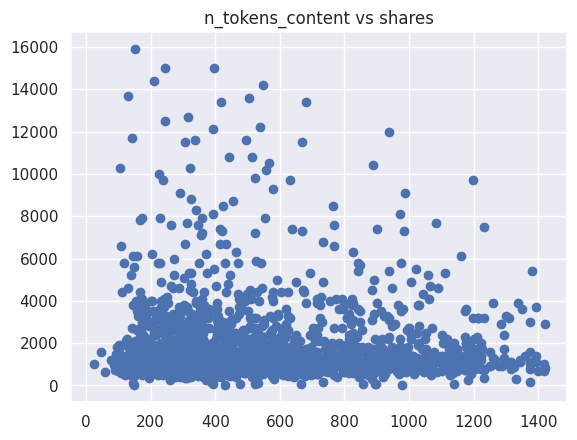

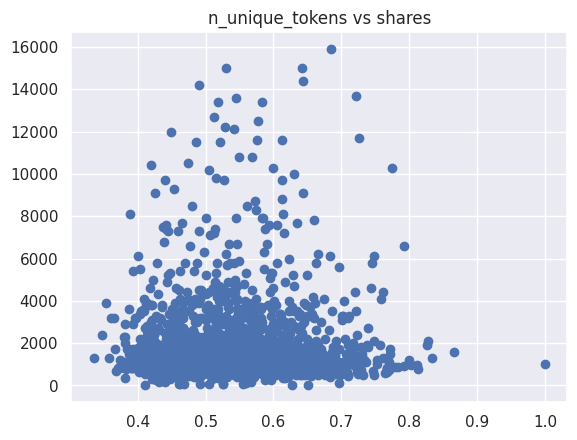

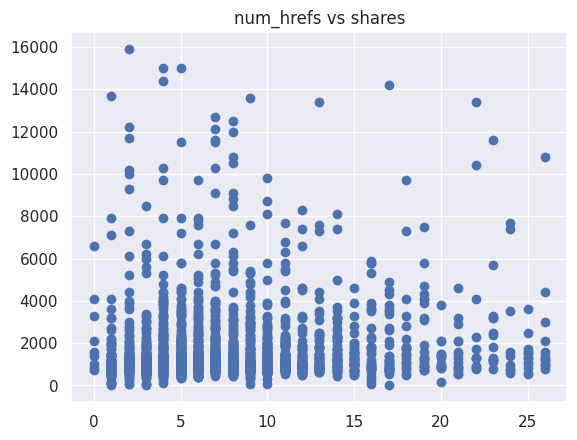

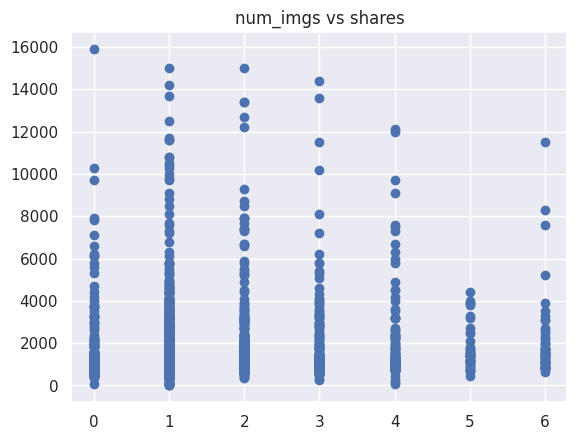

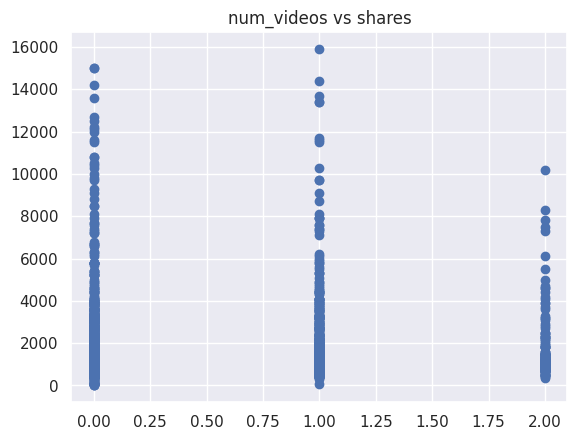

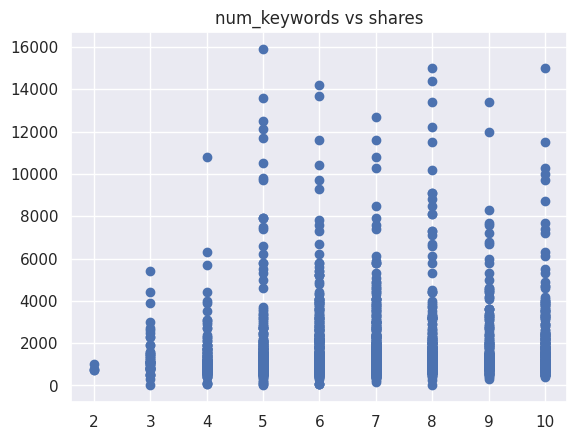

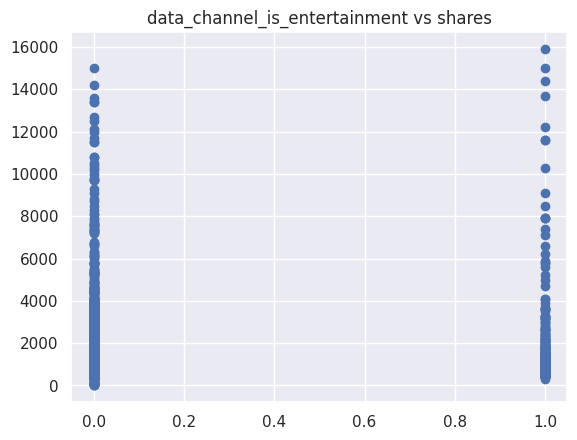

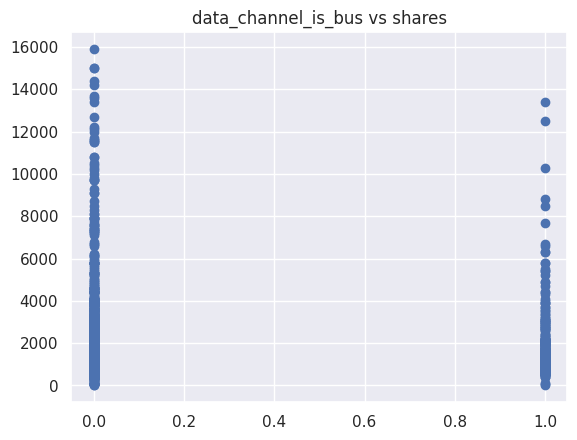

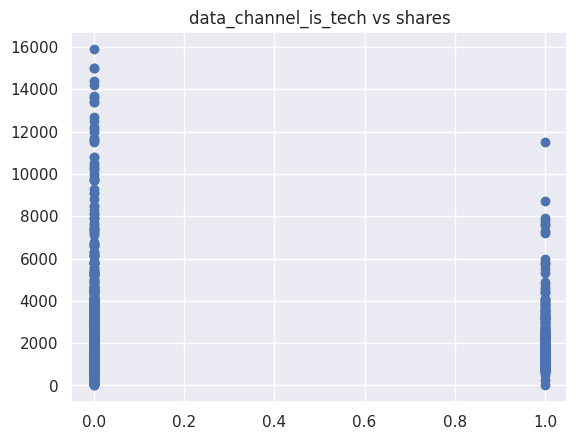

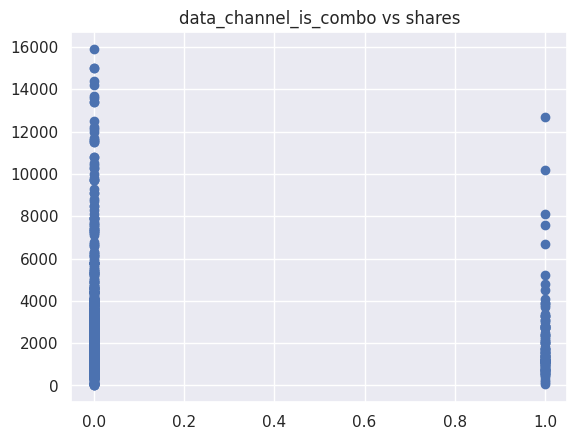

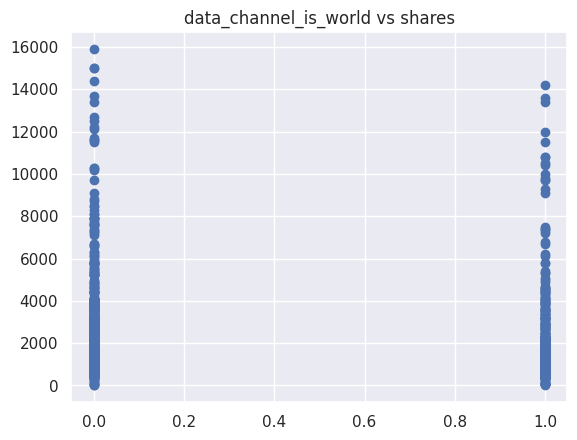

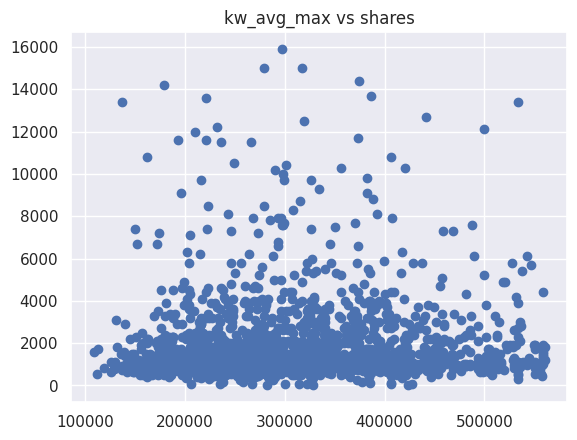

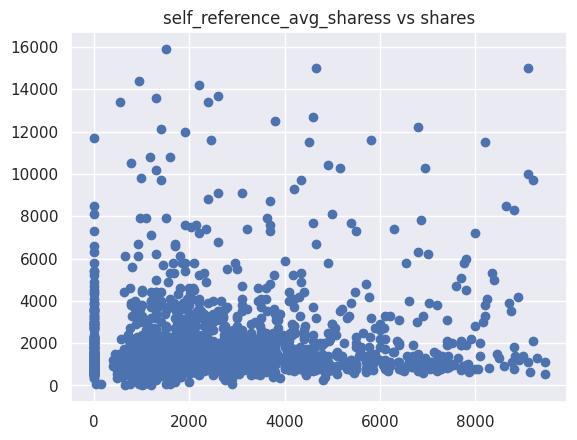

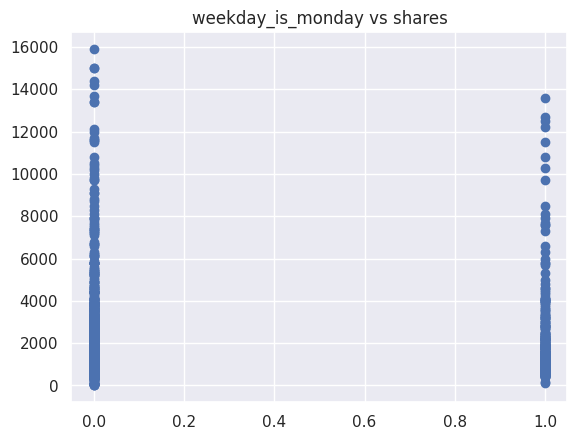

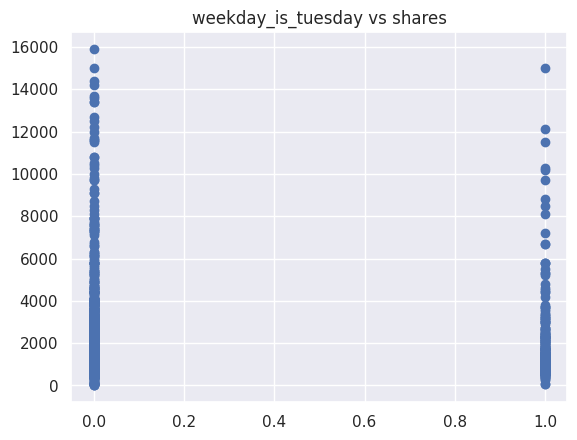

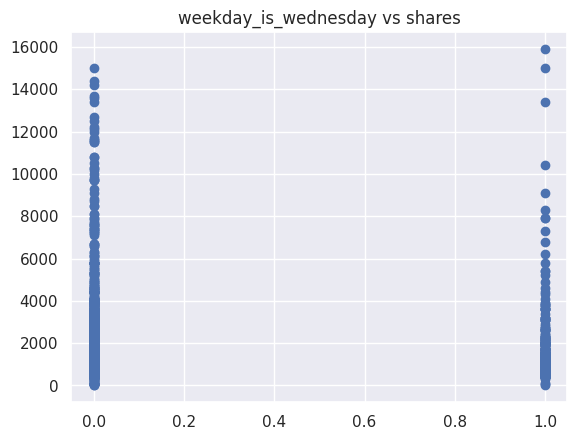

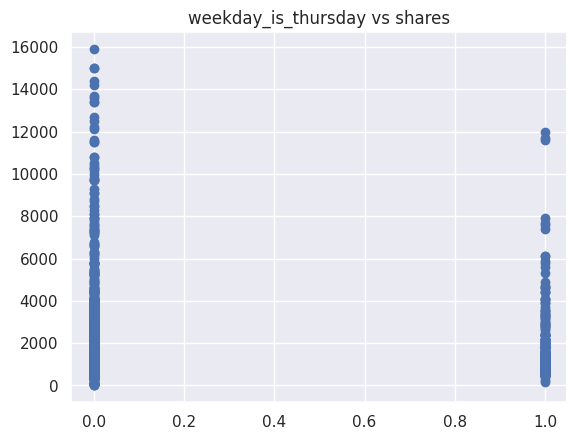

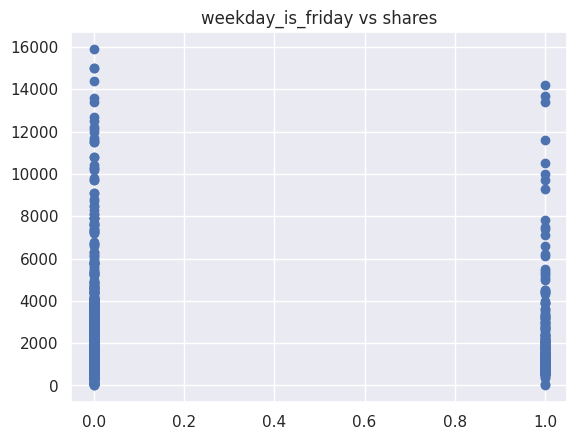

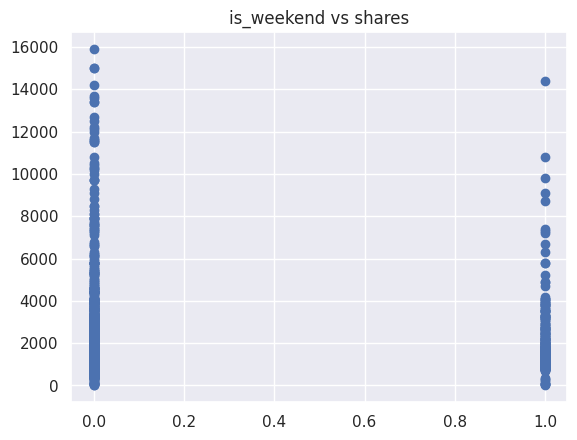

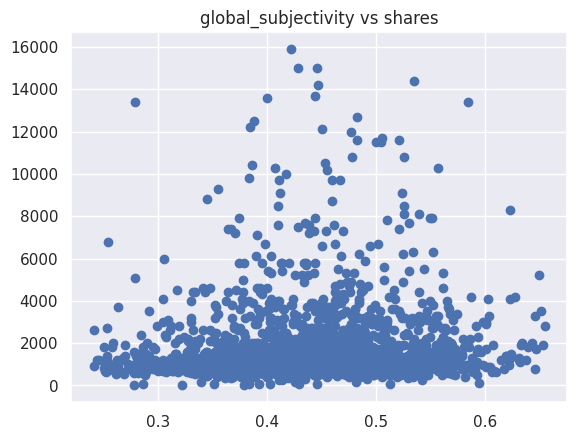

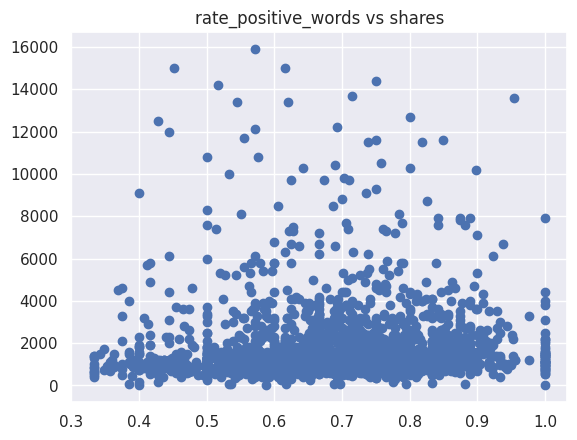

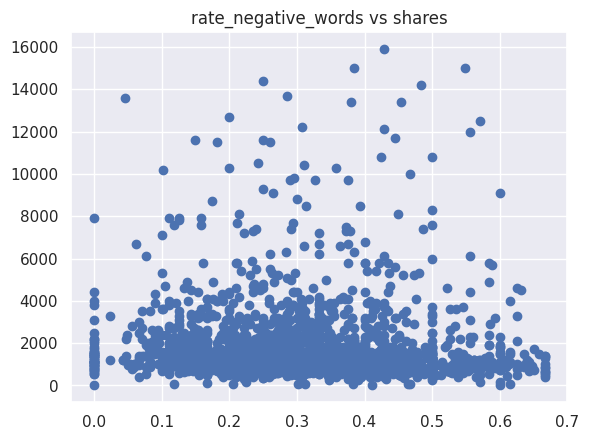

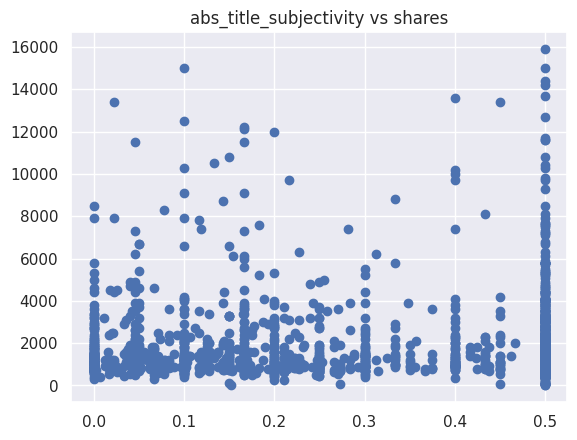

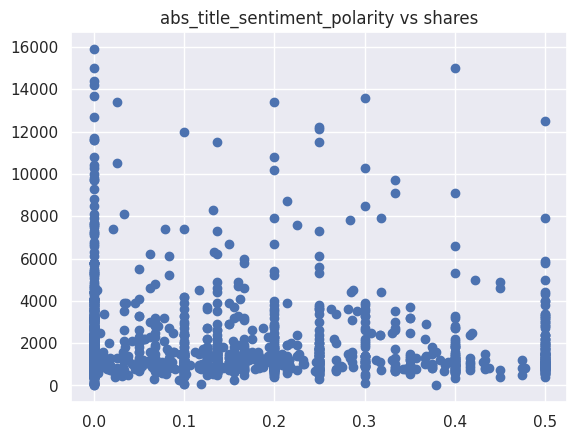

In [102]:
#bivariate analysis
for i in range(len(data_time.columns)-1):
    plt.scatter(data_time.iloc[:,i],data_time.shares)
    name=data_time.columns[i]
    plt.title(f'{name} vs shares')
    plt.show()

### Feature Selection: predict the shares number by multiregression model

In [103]:
data_time.columns

Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'num_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_tech', 'data_channel_is_combo',
       'data_channel_is_world', 'kw_avg_max', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'is_weekend',
       'global_subjectivity', 'rate_positive_words', 'rate_negative_words',
       'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares'],
      dtype='object')

In [104]:
predictors = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'num_hrefs', 'num_imgs', 'num_videos', 'num_keywords',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_tech', 'data_channel_is_combo',
       'data_channel_is_world', 'kw_avg_max', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'is_weekend',
       'global_subjectivity', 'rate_positive_words', 'rate_negative_words',
       'abs_title_subjectivity', 'abs_title_sentiment_polarity']
outcome='shares'

### multicollinearity

In [105]:
# VIF dataframe

X=data_time[predictors]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)for i in range(len(X.columns))]
  
vif_data

,feature,VIF
0,timedelta,1.031086
1,n_tokens_title,1.067176
2,n_tokens_content,3.833120
3,n_unique_tokens,3.768768
4,num_hrefs,1.249160
5,num_imgs,1.224993
6,num_videos,1.094002
7,num_keywords,1.457750
8,data_channel_is_entertainment,4.252273
9,data_channel_is_bus,4.007870


### backward elimication

In [106]:
train_X, valid_X, train_y, valid_y = train_test_split(data_time[predictors], data_time[outcome],
                                                      test_size=0.3,random_state=1)

In [107]:
#backward elimination
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)
v_backward=best_variables
print(best_variables)

Variables: timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, num_hrefs, num_imgs, num_videos, num_keywords, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_tech, data_channel_is_combo, data_channel_is_world, kw_avg_max, self_reference_avg_sharess, weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, is_weekend, global_subjectivity, rate_positive_words, rate_negative_words, abs_title_subjectivity, abs_title_sentiment_polarity
Start: score=26206.49
Step: score=26204.49, remove weekday_is_monday
Step: score=26202.49, remove rate_positive_words
Step: score=26200.49, remove abs_title_sentiment_polarity
Step: score=26198.49, remove timedelta
Step: score=26196.51, remove rate_negative_words
Step: score=26194.54, remove data_channel_is_combo
Step: score=26192.76, remove n_tokens_title
Step: score=26191.01, remove weekday_is_thursday
Step: score=26189.39, remove abs_title_subjectivity
Step: score=26188.03, remove n_

### forward selection

In [108]:
#forward selection
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)
v_forward=best_variables
print(best_variables)

Variables: timedelta, n_tokens_title, n_tokens_content, n_unique_tokens, num_hrefs, num_imgs, num_videos, num_keywords, data_channel_is_entertainment, data_channel_is_bus, data_channel_is_tech, data_channel_is_combo, data_channel_is_world, kw_avg_max, self_reference_avg_sharess, weekday_is_monday, weekday_is_tuesday, weekday_is_wednesday, weekday_is_thursday, weekday_is_friday, is_weekend, global_subjectivity, rate_positive_words, rate_negative_words, abs_title_subjectivity, abs_title_sentiment_polarity
Start: score=26277.61, constant
Step: score=26248.91, add self_reference_avg_sharess
Step: score=26227.38, add data_channel_is_world
Step: score=26211.96, add is_weekend
Step: score=26204.82, add num_imgs
Step: score=26199.47, add global_subjectivity
Step: score=26194.98, add num_hrefs
Step: score=26192.43, add num_videos
Step: score=26190.12, add weekday_is_tuesday
Step: score=26189.41, add num_keywords
Step: score=26186.93, add kw_avg_max
Step: score=26185.93, add data_channel_is_tech

### lasso

In [109]:
##lasso
lasso = Lasso(alpha=1)
lasso.fit(train_X, train_y)
regressionSummary(valid_y, lasso.predict(valid_X))
print(lasso.coef_)


Regression statistics

                      Mean Error (ME) : 120.3988
       Root Mean Squared Error (RMSE) : 1954.1520
            Mean Absolute Error (MAE) : 1070.4178
          Mean Percentage Error (MPE) : -53.5165
Mean Absolute Percentage Error (MAPE) : 76.4874
[ 2.08248313e-01  1.07289944e+01 -2.21076114e-01 -1.73749029e+02
  2.25620170e+01  1.06665097e+02  1.08757726e+02  6.41375955e+01
 -2.98069129e+02 -1.93198051e+02 -4.00761249e+02  1.92048881e+01
 -6.07895750e+02  9.76919624e-04  8.88848187e-02  7.97133080e-02
 -2.33602932e+02 -1.25684024e+02 -5.73104408e+01  1.31499882e+02
  4.22333322e+02  1.19507976e+03  2.05624106e+01 -2.13782863e-09
 -9.85037762e+01  0.00000000e+00]


In [110]:
##lasso_cv
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(train_X, train_y)
regressionSummary(valid_y, lasso_cv.predict(valid_X))
print('Lasso-CV chosen regularization: ', lasso_cv.alpha_)
print(lasso_cv.coef_)


Regression statistics

                      Mean Error (ME) : 92.8026
       Root Mean Squared Error (RMSE) : 1945.4246
            Mean Absolute Error (MAE) : 1102.3407
          Mean Percentage Error (MPE) : -60.4952
Mean Absolute Percentage Error (MAPE) : 82.9485
Lasso-CV chosen regularization:  19496.490635642775
[-0.          0.          0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.          0.00115736  0.11660327  0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
 -0.          0.        ]


In [111]:
lasso_result=pd.DataFrame(list(zip(lasso.coef_,predictors)),columns=['coef','predictor'])
#lasso_result
v_lasso=lasso_result[lasso_result.coef!=0].reset_index(drop=True).predictor.tolist()
v_lasso

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'num_hrefs',
 'num_imgs',
 'num_videos',
 'num_keywords',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_tech',
 'data_channel_is_combo',
 'data_channel_is_world',
 'kw_avg_max',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'is_weekend',
 'global_subjectivity',
 'rate_positive_words',
 'rate_negative_words',
 'abs_title_subjectivity']

In [112]:
df_temp=pd.DataFrame(predictors,columns=['predictors'])

In [113]:
v_list=[v_forward,v_backward,v_lasso]
col_list=['forward','backward','lasso']
for j in range(3):
    for i in range(len(predictors)):
        if predictors[i] in v_list[j]:
            df_temp.loc[i,col_list[j]]=predictors[i]
        else:
            df_temp.loc[i,col_list[j]]='None'

### Combine the result

In [114]:
df_temp

,predictors,forward,backward,lasso
0,timedelta,None,None,timedelta
1,n_tokens_title,None,None,n_tokens_title
2,n_tokens_content,None,None,n_tokens_content
3,n_unique_tokens,None,None,n_unique_tokens
4,num_hrefs,num_hrefs,num_hrefs,num_hrefs
5,num_imgs,num_imgs,num_imgs,num_imgs
6,num_videos,num_videos,num_videos,num_videos
7,num_keywords,num_keywords,num_keywords,num_keywords
8,data_channel_is_entertainment,None,None,data_channel_is_entertainment
9,data_channel_is_bus,None,None,data_channel_is_bus


### Recommend the list of features for your problem

In [115]:
new=['timedelta',
 'n_tokens_title',
 'n_unique_tokens',
 'num_hrefs',
 'num_videos',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_tech',
 'data_channel_is_combo',
 'data_channel_is_world',
 'kw_avg_max',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'is_weekend',
 'global_subjectivity',
 'rate_positive_words',
 'rate_negative_words',
 'abs_title_sentiment_polarity','shares']

In [49]:
len(new)

23

In [116]:
data_m3=data_time[new]
data_m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2114 entries, 17924 to 20037
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      2114 non-null   float64
 1   n_tokens_title                 2114 non-null   float64
 2   n_unique_tokens                2114 non-null   float64
 3   num_hrefs                      2114 non-null   float64
 4   num_videos                     2114 non-null   float64
 5   data_channel_is_entertainment  2114 non-null   float64
 6   data_channel_is_bus            2114 non-null   float64
 7   data_channel_is_tech           2114 non-null   float64
 8   data_channel_is_combo          2114 non-null   float64
 9   data_channel_is_world          2114 non-null   float64
 10  kw_avg_max                     2114 non-null   float64
 11  self_reference_avg_sharess     2114 non-null   float64
 12  weekday_is_monday              2114 non-nul

In [117]:
data_m3.reset_index(drop=True,inplace=True)
data_m3.head()

,timedelta,n_tokens_title,n_unique_tokens,num_hrefs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_sentiment_polarity,shares
0,90.0,13.0,0.725191,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.339394,1.000000,0.000000,0.131818,563
1,90.0,7.0,0.650350,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.277778,0.400000,0.600000,0.000000,22
2,90.0,12.0,0.496124,10.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.496221,0.658537,0.341463,0.000000,1100
3,90.0,12.0,0.452229,12.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.390490,0.707317,0.292683,0.000000,1200
4,90.0,11.0,0.500605,25.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.480387,0.690476,0.309524,0.000000,3600


# Milestone4&5

* Modeling
1. Introduction to each model
2. Implementation
3. Cross-validation and hyperparameter tuning
* Model evaluation 
1. Each model performance metrics
2. Summary of all models' performance 
3. Recommend the best model

# Clustering 

## Modeling preparation
 

In [119]:
all_columns=data_m3.columns

In [120]:
#Standardization
std = StandardScaler()
data_std=pd.DataFrame(std.fit_transform(data_m3),columns=all_columns)
data_std.head()

,timedelta,n_tokens_title,n_unique_tokens,num_hrefs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_sentiment_polarity,shares
0,1.720631,0.860177,2.257979,-1.342407,-0.683783,2.233533,-0.439320,-0.437787,-0.226315,-0.830571,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,-1.294761,2.256732,-2.256732,0.163974,-0.665763
1,1.720631,-1.903371,1.342684,-1.342407,-0.683783,-0.447721,2.276244,-0.437787,-0.226315,-0.830571,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,-2.097456,-2.078489,2.078489,-0.714539,-0.963480
2,1.720631,0.399586,-0.543471,0.364170,-0.683783,-0.447721,-0.439320,-0.437787,-0.226315,1.203991,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,0.748273,-0.210467,0.210467,-0.714539,-0.370246
3,1.720631,0.399586,-1.080296,0.743410,-0.683783,-0.447721,-0.439320,-0.437787,-0.226315,1.203991,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,-0.629119,0.141990,-0.141990,-0.714539,-0.315215
4,1.720631,-0.061005,-0.488674,3.208467,-0.683783,-0.447721,2.276244,-0.437787,-0.226315,-0.830571,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,0.542007,0.020309,-0.020309,-0.714539,1.005529


In [121]:
#Normalization
minmax=MinMaxScaler()
data_minmax=pd.DataFrame(minmax.fit_transform(data_m3),columns=all_columns)
data_minmax.tail()

,timedelta,n_tokens_title,n_unique_tokens,num_hrefs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_sentiment_polarity,shares
2109,0.0,0.6250,0.160280,0.346154,0.5,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.553998,0.641304,0.358696,0.000000,0.061595
2110,0.0,0.6250,0.164871,0.423077,0.5,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.227080,0.189189,0.810811,0.000000,0.043519
2111,0.0,0.5000,0.152990,0.461538,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.384143,0.509615,0.490385,0.000000,0.050132
2112,0.0,0.4375,0.167759,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.489119,0.700000,0.300000,0.428571,0.044212
2113,0.0,0.5000,0.370329,0.307692,0.5,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.520313,0.543478,0.456522,0.700000,0.231641


In [122]:
pca = PCA()
pca.fit(data_std)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[1.14908583e-01 7.28791915e-02 6.35537529e-02 6.04891328e-02
 5.56503616e-02 5.43859666e-02 5.30808904e-02 5.21945845e-02
 5.09607165e-02 4.94419129e-02 4.60232598e-02 4.44638381e-02
 4.33914177e-02 4.03910207e-02 3.97595383e-02 3.57974444e-02
 3.50016956e-02 3.39458419e-02 2.80971115e-02 2.30354890e-02
 2.54824990e-03 2.20681090e-27 6.74401250e-33]
[0.11490858 0.18778777 0.25134153 0.31183066 0.36748102 0.42186699
 0.47494788 0.52714246 0.57810318 0.62754509 0.67356835 0.71803219
 0.76142361 0.80181463 0.84157417 0.87737161 0.91237331 0.94631915
 0.97441626 0.99745175 1.         1.         1.        ]


In [123]:
pca=PCA(n_components=18)
df_afterpca=pca.fit_transform(data_std)
columns_pca =pca.get_feature_names_out()
data_std_pca=pd.DataFrame(df_afterpca,columns=columns_pca)
data_std_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17
0,-2.401952,1.672421,-0.638315,-3.122847,-0.358079,2.087086,-1.833362,-0.817683,0.632666,0.002025,-1.588872,0.107097,0.303226,-0.662004,1.510999,1.407243,0.495100,-0.313679
1,1.645101,2.097143,3.672202,0.244665,-0.744976,2.183486,-1.702366,-1.457574,-0.819672,1.041691,0.602620,-0.573734,0.359041,-1.230830,0.554436,0.688757,0.510383,-0.309718
2,1.464624,-0.979793,-0.429735,-1.205290,-0.183541,2.048641,-1.534953,-0.964999,0.064994,-0.411321,0.911931,-0.267472,0.388980,-0.122806,0.536143,0.287026,-0.940928,1.153104
3,1.472184,-1.565169,-0.135344,-1.344660,-0.011845,2.034142,-1.606180,-1.095472,0.048762,-0.587014,0.645914,-0.029735,0.265326,0.000626,0.768055,0.909166,-0.028216,0.418177
4,-0.387430,-1.970998,1.147127,0.851262,-1.461186,2.083600,-1.574673,-1.753403,1.192423,0.047608,2.181179,-0.661676,-0.372200,1.267813,0.466397,0.489707,0.024392,0.086739


In [124]:
pca = PCA()
pca.fit(data_minmax)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))

[1.56202504e-01 9.42755069e-02 8.72324269e-02 8.39227508e-02
 8.00226994e-02 7.71430431e-02 7.40691832e-02 6.34375265e-02
 4.52593607e-02 4.29912728e-02 3.84818947e-02 3.52873450e-02
 2.76844446e-02 2.11755929e-02 1.93483742e-02 1.54486661e-02
 1.44284471e-02 8.47469677e-03 5.99520577e-03 5.64981721e-03
 3.46924095e-03 1.04614406e-27 5.70012545e-33]
[0.1562025  0.25047801 0.33771044 0.42163319 0.50165589 0.57879893
 0.65286811 0.71630564 0.761565   0.80455627 0.84303817 0.87832551
 0.90600996 0.92718555 0.94653393 0.96198259 0.97641104 0.98488574
 0.99088094 0.99653076 1.         1.         1.        ]


In [125]:
pca=PCA(n_components=15)
df_afterpca=pca.fit_transform(data_minmax)
columns_pca =pca.get_feature_names_out()
data_minmax_pca=pd.DataFrame(df_afterpca,columns=columns_pca)
data_minmax_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14
0,-0.547188,0.217374,0.530380,-0.357150,-0.532400,-0.460869,0.732023,-0.098695,-0.249053,0.280424,-0.556188,-0.436713,-0.295351,0.104723,-0.309450
1,-0.307569,-0.198415,0.039002,0.472743,-0.396199,0.149241,1.073492,-0.180082,-0.194047,-0.317803,-0.341264,0.776805,0.100185,0.001453,-0.377975
2,0.713846,-0.053585,0.210832,0.055636,-0.060368,-0.325426,0.817030,-0.278936,-0.240286,0.018858,-0.454606,-0.023021,-0.031131,-0.191452,0.026305
3,0.715976,-0.070030,0.195979,0.076806,-0.045335,-0.316281,0.826816,-0.276515,-0.241071,0.028732,-0.470388,-0.079114,-0.074240,-0.196111,0.046512
4,-0.406776,-0.221151,0.006259,0.590027,-0.264434,0.114024,1.113621,-0.092807,-0.102954,-0.088969,-0.437388,0.190214,-0.039587,-0.435902,0.525558


# Clstering Modeling

In [126]:
%matplotlib inline

KMeans with standardized data

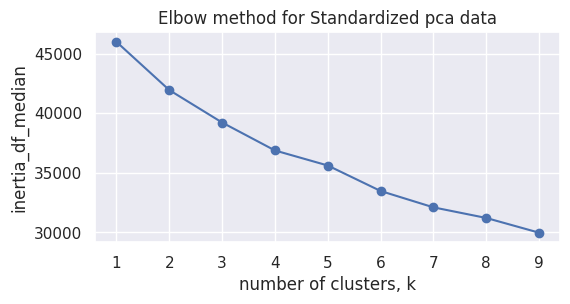

In [127]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_std_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(6,6))
plt.subplot(211)
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia_df_median')
plt.xticks(ks)
plt.title('Elbow method for Standardized pca data')
plt.show()

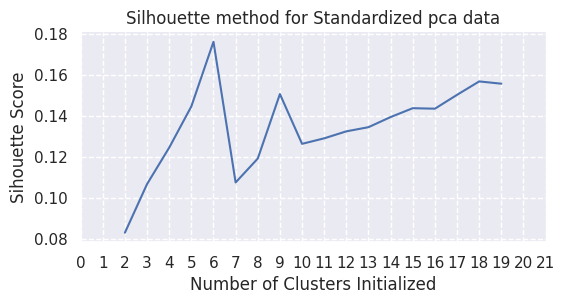

In [128]:
# The Silhouette method to find the Optimum Value of K
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(data_std_pca).labels_
    score = silhouette_score(data_std_pca, labels)
    scores.append(score)

plt.figure(figsize=(6, 6))
plt.subplot(212)
plt.plot(list(range(2,20)),scores)
plt.xticks(range(0,22,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
plt.title('Silhouette method for Standardized pca data')
sns.despine()

In [129]:
km_model=KMeans(n_clusters=4,random_state=0)
y_predict_km=km_model.fit_predict(data_std_pca)

In [130]:
km_std_cluster = pd.DataFrame(km_model.labels_.copy(), columns=['Kmeans_Clustering'])


In [131]:
km_std_cluster['Kmeans_Clustering'].value_counts()

0    850
3    804
2    357
1    103
Name: Kmeans_Clustering, dtype: int64

In [132]:
km_df=pd.concat([data_m3,km_std_cluster],axis=1)
km_df.head()

,timedelta,n_tokens_title,n_unique_tokens,num_hrefs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_sentiment_polarity,shares,Kmeans_Clustering
0,90.0,13.0,0.725191,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.339394,1.000000,0.000000,0.131818,563,2
1,90.0,7.0,0.650350,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.277778,0.400000,0.600000,0.000000,22,0
2,90.0,12.0,0.496124,10.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.496221,0.658537,0.341463,0.000000,1100,0
3,90.0,12.0,0.452229,12.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.390490,0.707317,0.292683,0.000000,1200,0
4,90.0,11.0,0.500605,25.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.480387,0.690476,0.309524,0.000000,3600,3


In [133]:
km_df.groupby(['Kmeans_Clustering']).mean()['shares']

Kmeans_Clustering
0    1505.505882
1    2102.242718
2    1771.941176
3    2013.552239
Name: shares, dtype: float64

In [134]:
km_df.groupby(['Kmeans_Clustering']).sum().iloc[:,5:10]

,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world
Kmeans_Clustering,,,,,
0,0.0,2.0,0.0,0.0,840.0
1,0.0,0.0,0.0,103.0,0.0
2,353.0,0.0,0.0,0.0,0.0
3,0.0,340.0,340.0,0.0,23.0


KMeans with normalized data

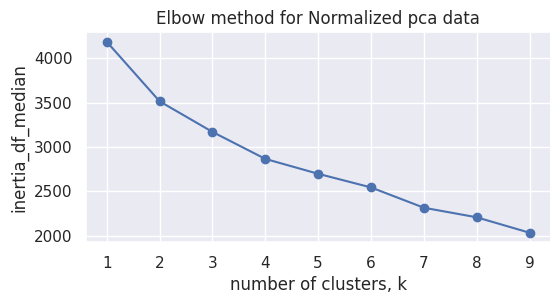

In [135]:
ks = range(1,10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data_minmax_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(6,6))
plt.subplot(211)
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia_df_median')
plt.xticks(ks)
plt.title('Elbow method for Normalized pca data')
plt.show()

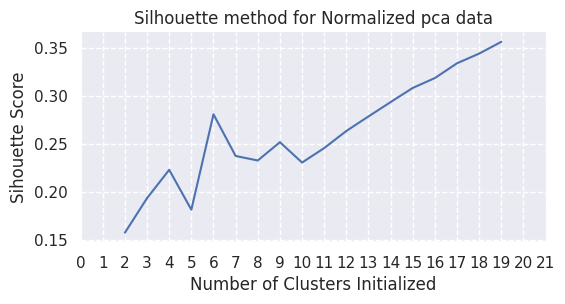

In [136]:
# The Silhouette method to find the Optimum Value of K
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(data_minmax_pca).labels_
    score = silhouette_score(data_minmax_pca, labels)
    scores.append(score)

plt.figure(figsize=(6, 6))
plt.subplot(212)
plt.plot(list(range(2,20)),scores)
plt.xticks(range(0,22,1)) 
plt.grid(linestyle='--')
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")
plt.title('Silhouette method for Normalized pca data')
sns.despine()

In [137]:
km_model=KMeans(n_clusters=4,random_state=0)
y_predict_km=km_model.fit_predict(data_minmax_pca)

In [138]:
km_minmax_cluster = pd.DataFrame(km_model.labels_.copy(), columns=['Kmeans_Clustering'])


In [139]:
km_minmax_cluster['Kmeans_Clustering'].value_counts()


0    863
2    558
3    353
1    340
Name: Kmeans_Clustering, dtype: int64

In [140]:
km_df2=pd.concat([data_m3,km_minmax_cluster],axis=1)
km_df2.head()

,timedelta,n_tokens_title,n_unique_tokens,num_hrefs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_sentiment_polarity,shares,Kmeans_Clustering
0,90.0,13.0,0.725191,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.339394,1.000000,0.000000,0.131818,563,3
1,90.0,7.0,0.650350,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.277778,0.400000,0.600000,0.000000,22,2
2,90.0,12.0,0.496124,10.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.496221,0.658537,0.341463,0.000000,1100,0
3,90.0,12.0,0.452229,12.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.390490,0.707317,0.292683,0.000000,1200,0
4,90.0,11.0,0.500605,25.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.480387,0.690476,0.309524,0.000000,3600,2


In [141]:
km_df2.groupby(['Kmeans_Clustering']).mean().shares


Kmeans_Clustering
0    1523.741599
1    2025.120588
2    2000.317204
3    1778.988669
Name: shares, dtype: float64

In [143]:
km_df2.groupby(['Kmeans_Clustering']).sum().iloc[:,5:10]

,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world
Kmeans_Clustering,,,,,
0,0.0,0.0,0.0,0.0,863.0
1,0.0,0.0,340.0,0.0,0.0
2,0.0,342.0,0.0,103.0,0.0
3,353.0,0.0,0.0,0.0,0.0


# DBSCAN

Standardized_pca data

Text(0.5, 1.0, 'K-Distance Graph')

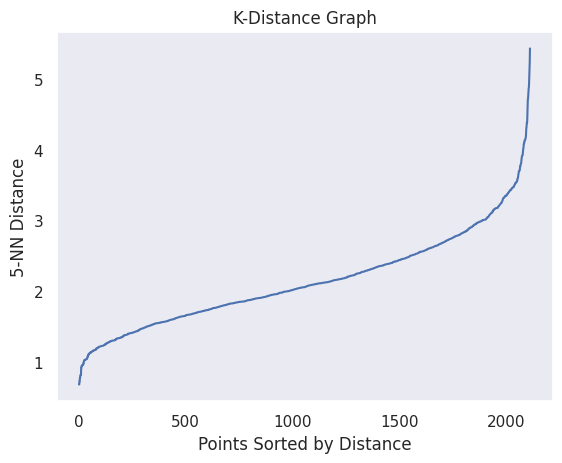

In [144]:
knn = NearestNeighbors(n_neighbors = 5)
model = knn.fit(data_std_pca)
distances, indices = knn.kneighbors(data_std_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('5-NN Distance')
plt.title('K-Distance Graph')

In [145]:
for eps in [i for i in range(4,6)]:
    for min_samples in range (6,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(data_std_pca)
        score = silhouette_score(data_std_pca, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 4
\min samples 6
clusters present: [-1  0  1  2]
clusters sizes: [  45 1972   14   83]
Silhouette Score: 0.1547352972415128

eps 4
\min samples 7
clusters present: [-1  0  1  2]
clusters sizes: [  49 1969   13   83]
Silhouette Score: 0.15443617239350013

eps 4
\min samples 8
clusters present: [-1  0  1  2]
clusters sizes: [  51 1969   12   82]
Silhouette Score: 0.15195040378142124

eps 5
\min samples 6
clusters present: [-1  0]
clusters sizes: [   7 2107]
Silhouette Score: 0.2931497140921229

eps 5
\min samples 7
clusters present: [-1  0]
clusters sizes: [   7 2107]
Silhouette Score: 0.2931497140921229

eps 5
\min samples 8
clusters present: [-1  0]
clusters sizes: [   7 2107]
Silhouette Score: 0.2931497140921229


In [146]:
db_model = DBSCAN(eps = 4, min_samples = 6)
y_pred_db=db_model.fit_predict(data_std_pca)
db_cluster=pd.DataFrame(db_model.labels_.copy(), columns=['DBSCAN_Clustering'])
db_df = pd.concat([data_m3.copy(), db_cluster], axis=1)
db_df.head()

,timedelta,n_tokens_title,n_unique_tokens,num_hrefs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world,...,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_sentiment_polarity,shares,DBSCAN_Clustering
0,90.0,13.0,0.725191,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.339394,1.000000,0.000000,0.131818,563,0
1,90.0,7.0,0.650350,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.277778,0.400000,0.600000,0.000000,22,0
2,90.0,12.0,0.496124,10.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.496221,0.658537,0.341463,0.000000,1100,0
3,90.0,12.0,0.452229,12.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.390490,0.707317,0.292683,0.000000,1200,0
4,90.0,11.0,0.500605,25.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.480387,0.690476,0.309524,0.000000,3600,0


In [147]:
db_df.groupby(['DBSCAN_Clustering']).mean().shares

DBSCAN_Clustering
-1    8743.622222
 0    1609.835700
 1    2192.857143
 2    1794.349398
Name: shares, dtype: float64

In [148]:
db_df.groupby(['DBSCAN_Clustering']).sum().iloc[:,5:10]

,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world
DBSCAN_Clustering,,,,,
-1,15.0,4.0,5.0,6.0,8.0
0,338.0,338.0,335.0,0.0,855.0
1,0.0,0.0,0.0,14.0,0.0
2,0.0,0.0,0.0,83.0,0.0


normalized data

Text(0.5, 1.0, 'K-Distance Graph')

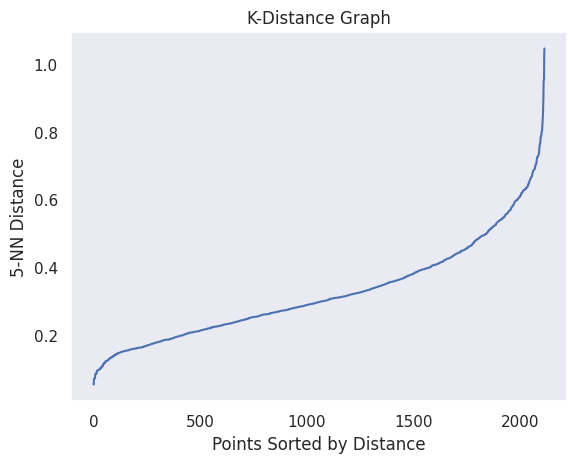

In [149]:
knn = NearestNeighbors(n_neighbors = 5)
model = knn.fit(data_minmax_pca)
distances, indices = knn.kneighbors(data_minmax_pca)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('5-NN Distance')
plt.title('K-Distance Graph')

In [150]:
for eps in [i/10 for i in range(6,10)]:
    for min_samples in range (6,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(data_minmax_pca)
        score = silhouette_score(data_minmax_pca, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')
#unideal result


eps 0.6
\min samples 6
clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34]
clusters sizes: [275 119  46   8  40  47   7 139  20 156  67  59  63 143  79  74  55  11
  58 128  49  68  46  63 136  37  33  26   6   6  16   9   8   5   6   6]
Silhouette Score: 0.3064795762283415

eps 0.6
\min samples 7
clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28]
clusters sizes: [344 117  46   8  40  47 139 156  67  56  59 143  79  74  49  57 128  47
  64  44  63 134  37   6  33  26  19  15   9   8]
Silhouette Score: 0.3382107654159537

eps 0.6
\min samples 8
clusters present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27]
clusters sizes: [373 115  46  40 138 154  64  56  59 141  79  73  48  56 128  47  63  44
  63 131  37  46  31  26  16   8  15   8   9]
Silhouette Score: 0.3402284612195575

eps 0.7
\min samples 6
clusters

# Classification

## Modeling preparation

with standardized DBCAN label

KNN
Decision Tree
Random Forest
AdaBoost/XGBoost

In [151]:
predictors=['timedelta', 'n_tokens_title', 'n_unique_tokens', 'num_hrefs',
       'num_videos', 'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_tech', 'data_channel_is_combo',
       'data_channel_is_world', 'kw_avg_max', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'is_weekend',
       'global_subjectivity', 'rate_positive_words', 'rate_negative_words',
       'abs_title_sentiment_polarity']
outcome='DBSCAN_Clustering'

In [152]:
warnings.filterwarnings("ignore")

In [160]:
db_df.groupby(['DBSCAN_Clustering']).mean().shares

DBSCAN_Clustering
-1    8743.622222
 0    1609.835700
 1    2192.857143
 2    1794.349398
Name: shares, dtype: float64

In [164]:
data_db_std = pd.concat([data_std.iloc[:,:-1].copy(), db_cluster], axis=1)

In [165]:
#combine label 0,1,2 as '0' indicating unpopular, label -1 indicates very popular, convert label -1 to 1
data_db_std.loc[data_db_std['DBSCAN_Clustering']!=-1,'DBSCAN_Clustering']=0
data_db_std.loc[data_db_std['DBSCAN_Clustering']==-1,'DBSCAN_Clustering']=1


In [166]:
data_db_std.head()

,timedelta,n_tokens_title,n_unique_tokens,num_hrefs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_sentiment_polarity,DBSCAN_Clustering
0,1.720631,0.860177,2.257979,-1.342407,-0.683783,2.233533,-0.439320,-0.437787,-0.226315,-0.830571,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,-1.294761,2.256732,-2.256732,0.163974,0
1,1.720631,-1.903371,1.342684,-1.342407,-0.683783,-0.447721,2.276244,-0.437787,-0.226315,-0.830571,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,-2.097456,-2.078489,2.078489,-0.714539,0
2,1.720631,0.399586,-0.543471,0.364170,-0.683783,-0.447721,-0.439320,-0.437787,-0.226315,1.203991,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,0.748273,-0.210467,0.210467,-0.714539,0
3,1.720631,0.399586,-1.080296,0.743410,-0.683783,-0.447721,-0.439320,-0.437787,-0.226315,1.203991,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,-0.629119,0.141990,-0.141990,-0.714539,0
4,1.720631,-0.061005,-0.488674,3.208467,-0.683783,-0.447721,2.276244,-0.437787,-0.226315,-0.830571,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,0.542007,0.020309,-0.020309,-0.714539,0


In [167]:
data_db_std.DBSCAN_Clustering.value_counts()

0    2069
1      45
Name: DBSCAN_Clustering, dtype: int64

## Resample

In [169]:
# imbalanced dataset
target0=data_db_std[data_db_std['DBSCAN_Clustering']==0] #unpopular news
target1=data_db_std[data_db_std['DBSCAN_Clustering']==1] #popular news

In [175]:
n_sample=int((len(target0)+len(target1))/2)
target0= resample(target0,replace=True,n_samples=n_sample,random_state=1)
target1= resample(target1,replace=True,n_samples=n_sample,random_state=1)

In [176]:
target=pd.concat([target0,target1])
target['DBSCAN_Clustering'].value_counts()

0    1057
1    1057
Name: DBSCAN_Clustering, dtype: int64

In [177]:
data_db_std=target
data_db_std.head()

,timedelta,n_tokens_title,n_unique_tokens,num_hrefs,num_videos,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_tech,data_channel_is_combo,data_channel_is_world,...,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,is_weekend,global_subjectivity,rate_positive_words,rate_negative_words,abs_title_sentiment_polarity,DBSCAN_Clustering
1081,-0.028827,0.399586,-0.974402,-0.015069,-0.683783,-0.447721,-0.439320,-0.437787,-0.226315,1.203991,...,-0.483086,-0.451522,-0.443146,-0.422342,2.602318,-2.047513,0.735602,-0.735602,-0.714539,0
241,1.312424,-0.061005,1.147148,-0.773548,-0.683783,-0.447721,-0.439320,-0.437787,4.418628,-0.830571,...,-0.483086,-0.451522,-0.443146,2.367752,-0.384273,1.737739,-1.355952,1.355952,-0.714539,0
1119,-0.087142,1.320768,-1.033574,0.174551,-0.683783,-0.447721,-0.439320,-0.437787,-0.226315,1.203991,...,-0.483086,-0.451522,-0.443146,-0.422342,-0.384273,-0.962430,-0.323756,0.323756,-0.714539,0
923,0.204434,-2.363962,-1.074748,-1.152788,-0.683783,-0.447721,2.276244,-0.437787,-0.226315,-0.830571,...,-0.483086,2.214730,-0.443146,-0.422342,-0.384273,-0.632548,1.306026,-1.306026,-0.714539,0
979,0.146119,-0.982188,0.074658,0.364170,-0.683783,-0.447721,2.276244,-0.437787,-0.226315,-0.830571,...,-0.483086,-0.451522,2.256595,-0.422342,-0.384273,0.626794,0.981667,-0.981667,-0.048081,0


In [185]:
def evaluate(model,y_pred):
  model.fit(train_X,train_y)
  y_pred=model.predict(test_X)
  conf_matrix=confusion_matrix(test_y,y_pred)
  acc_score=accuracy_score(test_y,y_pred)
  print("confussion matrix")
  print(conf_matrix)
  val=str(model)
  print(f"Accuracy of {val}:",acc_score)
  print(classification_report(test_y,y_pred))

## Modeling

#KNN

In [178]:
train_X, test_X, train_y, test_y = train_test_split(data_db_std[predictors], data_db_std[outcome],test_size=0.4,random_state=1)


In [202]:
knn = KNeighborsClassifier(n_neighbors= 4)

knn.fit(train_X,train_y)
#knn.score(test_X,test_y)

KNeighborsClassifier(n_neighbors=4)

In [203]:
y_pred_knn = knn.predict(test_X)


In [204]:
evaluate(knn,y_pred_knn)

confussion matrix
[[403  20]
 [  0 423]]
Accuracy of KNeighborsClassifier(n_neighbors=4): 0.9763593380614657
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       423
           1       0.95      1.00      0.98       423

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



In [179]:
test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(train_X,train_y)
    
    train_scores.append(knn.score(train_X,train_y))
    test_scores.append(knn.score(test_X,test_y))

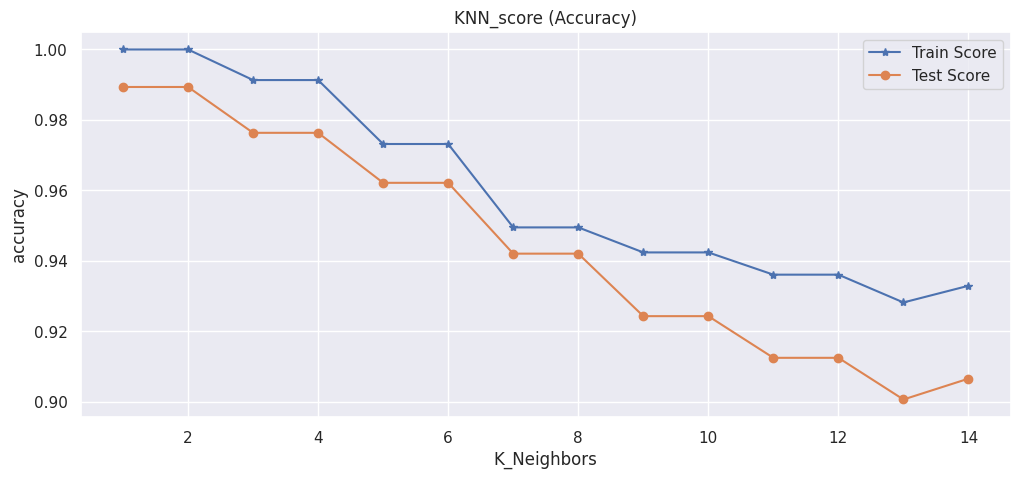

In [180]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores,marker='o',label='Test Score')
plt.title('KNN_score (Accuracy)')
plt.xlabel('K_Neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Hyperparameter tuning

In [181]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = { 'n_neighbors':np.arange(1,15),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5,n_jobs = -1,verbose=2)
knn_cv.fit(train_X,train_y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best Score:0.9842301826896144
Best Parameters: {'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}


In [191]:
best_knn=knn_cv.best_estimator_


## KNN Evaluation

In [194]:
y_pred_knn_best=best_knn.predict(test_X)


In [195]:
evaluate(best_knn,y_pred_knn_best)


confussion matrix
[[414   9]
 [  0 423]]
Accuracy of KNeighborsClassifier(n_neighbors=1): 0.9893617021276596
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       423
           1       0.98      1.00      0.99       423

    accuracy                           0.99       846
   macro avg       0.99      0.99      0.99       846
weighted avg       0.99      0.99      0.99       846



# Random Forest

In [211]:
rf = RandomForestClassifier(n_estimators=5, criterion='entropy',random_state=2)
rf.fit(train_X,train_y)
y_pred_rf = rf.predict(test_X)
rf_conf_matrix = confusion_matrix(test_y, y_pred_rf)
rf_acc_score = accuracy_score(test_y, y_pred_rf)
print("confussion matrix")
print(rf_conf_matrix)
print("Accuracy of Random Forest:",rf_acc_score)
print(classification_report(test_y,y_pred_rf))

confussion matrix
[[411  12]
 [  0 423]]
Accuracy of Random Forest: 0.9858156028368794
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       423
           1       0.97      1.00      0.99       423

    accuracy                           0.99       846
   macro avg       0.99      0.99      0.99       846
weighted avg       0.99      0.99      0.99       846



Hyperparameter tuning -- RandomizedSearchCV

In [212]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(5,20,5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(5,20,5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [5, 10, 15], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [213]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=22, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_X, train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [5, 10, 15]},
                   random_state=22, verbose=2)

In [220]:
print('Best Score:'+ str(rf_random.best_score_))
print('Best parameters:'+str(rf_random.best_params_))

Best Score:0.9984239558707643
Best parameters:{'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15, 'bootstrap': False}


In [218]:
#model accuracy
best_random_rf=rf_random.best_estimator_
y_pred_rf_best=best_random_rf.predict(test_X)

In [219]:
evaluate(best_random_rf,y_pred_rf_best)

confussion matrix
[[423   0]
 [  0 423]]
Accuracy of RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_split=5,
                       n_estimators=10): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       423
           1       1.00      1.00      1.00       423

    accuracy                           1.00       846
   macro avg       1.00      1.00      1.00       846
weighted avg       1.00      1.00      1.00       846



Hyperparameter tuning -- GridSearchCV

In [224]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,15,20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators': [5, 10, 15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
rf_grid.fit(train_X,train_y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20],
                         'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5, 6],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [5, 10, 15]},
             verbose=2)

In [225]:
print('Best Score:'+ str(rf_grid.best_score_))
print('Best parameters:'+str(rf_grid.best_params_))

Best Score:0.9881759343290047
Best parameters:{'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 15}


In [227]:
best_grid_rf=rf_grid.best_estimator_
y_pred_rf_best_grid= best_grid_rf.predict(test_X)


In [228]:

evaluate(best_grid_rf,y_pred_rf_best_grid)

confussion matrix
[[418   5]
 [  0 423]]
Accuracy of RandomForestClassifier(max_depth=10, max_features=3, min_samples_leaf=3,
                       min_samples_split=3, n_estimators=15): 0.9940898345153665
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       423
           1       0.99      1.00      0.99       423

    accuracy                           0.99       846
   macro avg       0.99      0.99      0.99       846
weighted avg       0.99      0.99      0.99       846



# Decision Tree

In [206]:
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(train_X, train_y)
y_pred_dt = dt.predict(test_X)
dt_conf_matrix = confusion_matrix(test_y, y_pred_dt)
dt_acc_score = accuracy_score(test_y, y_pred_dt)
print("confussion matrix")
print(dt_conf_matrix)
print("Accuracy of DecisionTreeClassifier:",dt_acc_score)
print(classification_report(test_y,y_pred_dt))


confussion matrix
[[325  98]
 [ 25 398]]
Accuracy of DecisionTreeClassifier: 0.8546099290780141
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       423
           1       0.80      0.94      0.87       423

    accuracy                           0.85       846
   macro avg       0.87      0.85      0.85       846
weighted avg       0.87      0.85      0.85       846



# hyperparameter tuning -- KFold

In [234]:
max_depth = range(5,30,5)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for val in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth= val, random_state=0), train_X, train_y, cv= kf, scoring="accuracy")
    print(f'Average score({val}): {"{:.3f}".format(score.mean())}')

Average score(5): 0.836
Average score(10): 0.947
Average score(15): 0.960
Average score(20): 0.959
Average score(25): 0.959


In [235]:
dt_best = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 15)

In [237]:
dt_best.fit(train_X,train_y)
y_pred_dt_best=dt_best.predict(test_X)

In [238]:
evaluate(dt_best,y_pred_dt_best)

confussion matrix
[[403  20]
 [  0 423]]
Accuracy of DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=0): 0.9763593380614657
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       423
           1       0.95      1.00      0.98       423

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



# AdaBoost

In [239]:
ada= AdaBoostClassifier(n_estimators=5)
ada.fit(train_X,train_y)
y_pred_ada = ada.predict(test_X)
ada_conf_matrix = confusion_matrix(test_y, y_pred_ada)
ada_acc_score = accuracy_score(test_y, y_pred_ada)
print("confussion matrix")
print(ada_conf_matrix)
print("Accuracy of AdaBoost:",ada_acc_score)
print(classification_report(test_y,y_pred_ada))

confussion matrix
[[348  75]
 [152 271]]
Accuracy of AdaBoost: 0.7316784869976359
              precision    recall  f1-score   support

           0       0.70      0.82      0.75       423
           1       0.78      0.64      0.70       423

    accuracy                           0.73       846
   macro avg       0.74      0.73      0.73       846
weighted avg       0.74      0.73      0.73       846



hyperparameter tuning

In [258]:
param_grid = {
    'n_estimators': range(10,200,20),
    'learning_rate':[0.5,0.8,0.9,0.95,1]
}
# Create a based model
ada= AdaBoostClassifier()
# Instantiate the grid search model
ada_grid = GridSearchCV(estimator = ada, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
ada_grid.fit(train_X,train_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.8, 0.9, 0.95, 1],
                         'n_estimators': range(10, 200, 20)},
             verbose=2)

In [259]:
print('Best hyper-parameters found:')
print(ada_grid.best_params_)
print('Best score:')
print(ada_grid.best_score_)

Best hyper-parameters found:
{'learning_rate': 1, 'n_estimators': 130}
Best score:
0.9550509973520965


In [260]:
ada_best=ada_grid.best_estimator_
y_pred_ada_best=ada_best.predict(test_X)
evaluate(ada_best,y_pred_ada_best)

confussion matrix
[[392  31]
 [  0 423]]
Accuracy of AdaBoostClassifier(learning_rate=1, n_estimators=130): 0.9633569739952719
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       423
           1       0.93      1.00      0.96       423

    accuracy                           0.96       846
   macro avg       0.97      0.96      0.96       846
weighted avg       0.97      0.96      0.96       846



#XGBoost

In [261]:
xgb = XGBClassifier(learning_rate=0.01, n_estimators=10, max_depth=15)
xgb.fit(train_X, train_y)
y_pred_xgb = xgb.predict(test_X)
xgb_conf_matrix = confusion_matrix(test_y, y_pred_xgb)
xgb_acc_score = accuracy_score(test_y, y_pred_xgb)
print("confussion matrix")
print(xgb_conf_matrix)
print("Accuracy of XGBoost:",xgb_acc_score)
print(classification_report(test_y,y_pred_xgb))

confussion matrix
[[377  46]
 [  0 423]]
Accuracy of XGBoost: 0.9456264775413712
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       423
           1       0.90      1.00      0.95       423

    accuracy                           0.95       846
   macro avg       0.95      0.95      0.95       846
weighted avg       0.95      0.95      0.95       846



# hyperparameter tuning

In [262]:
param_grid = {
    'n_estimators': range(0,20,5),
    'learning_rate':[0.01,0.03,0.1,0.3,0.8],
    'max_depth':[2,5,8,13,18]
}
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
xgb_grid = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
xgb_grid.fit(train_X,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.03, 0.1, 0.3, 0.8],
                         'max_depth': [2, 5, 8, 13, 18],
                         'n_estimators': range(0, 20, 5)},
             verbose=2)

In [263]:
print('Best hyper-parameters found:')
print(xgb_grid.best_params_)
print('Best score:')
print(xgb_grid.best_score_)


Best hyper-parameters found:
{'learning_rate': 0.8, 'max_depth': 13, 'n_estimators': 15}
Best score:
0.9771380233717634


In [264]:
xgb_best=xgb_grid.best_estimator_
y_pred_xgb_best=xgb_best.predict(test_X)
evaluate(xgb_best,y_pred_xgb_best)

confussion matrix
[[419   4]
 [  0 423]]
Accuracy of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=15, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): 0.9952718676122931
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       423
           1       0.99      1.00      1.00       423

    accuracy   

# Model Evaluation Summary

In [291]:
acc_score=[100*accuracy_score(test_y,i) for i in [y_pred_knn_best,y_pred_rf_best,
                                              y_pred_dt_best,y_pred_ada_best,y_pred_xgb_best]]

In [292]:
rec_score=[100*recall_score(test_y,i,average=None,)[0] for i in [y_pred_knn_best,y_pred_rf_best,
                                                             y_pred_dt_best,y_pred_ada_best,y_pred_xgb_best]]


In [294]:
#accuracy & recall table
model_ev = pd.DataFrame({'Accuracy': acc_score,'Recall_label_0':rec_score},
                        index=['K-Nearest Neighbour','Random Forest','Decision Tree','AdaBoosting','XGBoosting'])
model_ev

,Accuracy,Recall_label_0
K-Nearest Neighbour,98.936170,97.872340
Random Forest,100.000000,100.000000
Decision Tree,97.635934,95.271868
AdaBoosting,96.335697,92.671395
XGBoosting,99.527187,99.054374


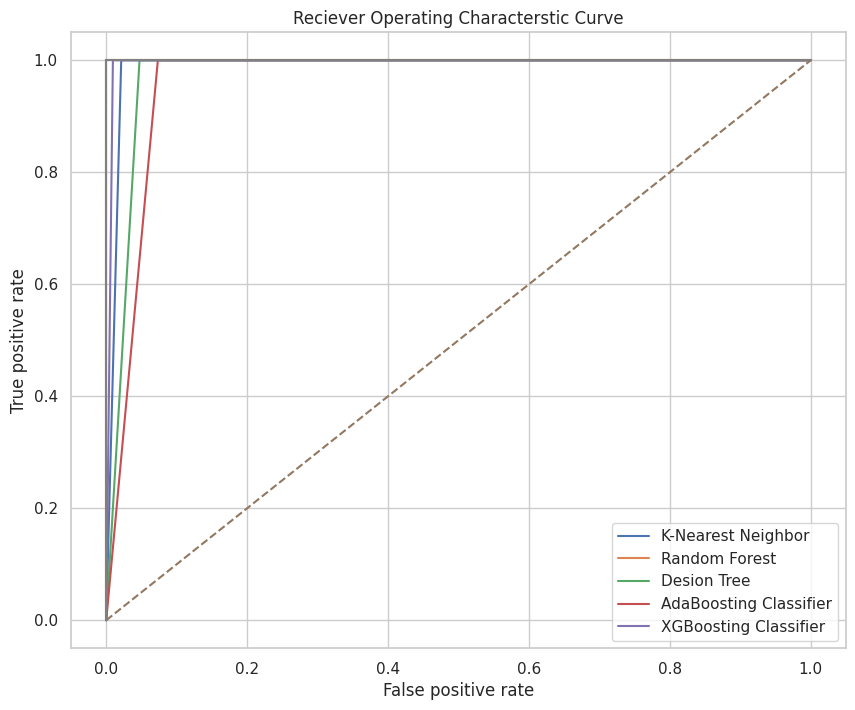

In [266]:
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(test_y,y_pred_knn_best)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(test_y,y_pred_rf_best)                                                             
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(test_y,y_pred_dt_best)
ada_false_positive_rate,ada_true_positive_rate,ada_threshold = roc_curve(test_y,y_pred_ada_best)
xgb_false_positive_rate,xgb_true_positive_rate,xgb_threshold = roc_curve(test_y,y_pred_xgb_best)


sns.set_style('whitegrid')
plt.figure(figsize=(10,8), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(ada_false_positive_rate,ada_true_positive_rate,label='AdaBoosting Classifier')
plt.plot(xgb_false_positive_rate,xgb_true_positive_rate,label='XGBoosting Classifier')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()